In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stat
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns',1000)

In [2]:
import nltk
nltk.download('punkt')
from nltk.corpus import words,stopwords
nltk.download('stopwords')
from nltk.stem import PorterStemmer
stemmer=PorterStemmer()

[nltk_data] Error loading punkt: <urlopen error [Errno 2] No such file
[nltk_data]     or directory>
[nltk_data] Error loading stopwords: <urlopen error [Errno 2] No such
[nltk_data]     file or directory>


In [3]:
df=pd.read_csv('rs_dataset/netflix_titles.csv')
df=df[df.columns[1:]].drop_duplicates().reset_index(drop=True)
df=df.reset_index(drop=False).rename(columns={'index':'show_id'})
df.show_id=df.show_id+1
df.show_id='s'+df.show_id.astype('string')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,25-Sep-21,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,24-Sep-21,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,24-Sep-21,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
df1=pd.read_csv('rs_dataset/IMDb movies.csv')
df1.head()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3361: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,writer,production_company,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,Alexander Black,Alexander Black Photoplays,"Blanche Bayliss, William Courtenay, Chauncey D...",The adventures of a female reporter in the 1890s.,5.9,154,NaN,NaN,NaN,NaN,1.0,2.0
1,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,12/26/1906,"Biography, Crime, Drama",70,Australia,None,Charles Tait,Charles Tait,J. and N. Tait,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1,589,"$2,250",NaN,NaN,NaN,7.0,7.0
2,tt0001892,Den sorte drÃ¸m,Den sorte drÃ¸m,1911,8/19/1911,Drama,53,"Germany, Denmark",NaN,Urban Gad,"Urban Gad, Gebhard SchÃ¤tzler-Perasini",Fotorama,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",Two men of high rank are both wooing the beaut...,5.8,188,NaN,NaN,NaN,NaN,5.0,2.0
3,tt0002101,Cleopatra,Cleopatra,1912,11/13/1912,"Drama, History",100,USA,English,Charles L. Gaskill,Victorien Sardou,Helen Gardner Picture Players,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",The fabled queen of Egypt's affair with Roman ...,5.2,446,"$45,000",NaN,NaN,NaN,25.0,3.0
4,tt0002130,L'Inferno,L'Inferno,1911,3/6/1911,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",Dante Alighieri,Milano Film,"Salvatore Papa, Arturo Pirovano, Giuseppe de L...",Loosely adapted from Dante's Divine Comedy and...,7.0,2237,NaN,NaN,NaN,NaN,31.0,14.0


In [5]:
df2=pd.read_csv('rs_dataset/IMDb ratings.csv')
df2.head()

,imdb_title_id,weighted_average_vote,total_votes,mean_vote,median_vote,votes_10,votes_9,votes_8,votes_7,votes_6,votes_5,votes_4,votes_3,votes_2,votes_1,allgenders_0age_avg_vote,allgenders_0age_votes,allgenders_18age_avg_vote,allgenders_18age_votes,allgenders_30age_avg_vote,allgenders_30age_votes,allgenders_45age_avg_vote,allgenders_45age_votes,males_allages_avg_vote,males_allages_votes,males_0age_avg_vote,males_0age_votes,males_18age_avg_vote,males_18age_votes,males_30age_avg_vote,males_30age_votes,males_45age_avg_vote,males_45age_votes,females_allages_avg_vote,females_allages_votes,females_0age_avg_vote,females_0age_votes,females_18age_avg_vote,females_18age_votes,females_30age_avg_vote,females_30age_votes,females_45age_avg_vote,females_45age_votes,top1000_voters_rating,top1000_voters_votes,us_voters_rating,us_voters_votes,non_us_voters_rating,non_us_voters_votes
0,tt0000009,5.9,154,5.9,6.0,12,4,10,43,28,28,9,1,5,14,7.2,4.0,6.0,38.0,5.7,50.0,6.6,35.0,6.2,97.0,7.0,1.0,5.9,24.0,5.6,36.0,6.7,31.0,6.0,35.0,7.3,3.0,5.9,14.0,5.7,13.0,4.5,4.0,5.7,34.0,6.4,51.0,6.0,70.0
1,tt0000574,6.1,589,6.3,6.0,57,18,58,137,139,103,28,20,13,16,6.0,1.0,6.1,114.0,6.0,239.0,6.3,115.0,6.1,425.0,6.0,1.0,6.2,102.0,6.0,210.0,6.2,100.0,6.2,50.0,NaN,NaN,5.9,12.0,6.2,23.0,6.6,14.0,6.4,66.0,6.0,96.0,6.2,331.0
2,tt0001892,5.8,188,6.0,6.0,6,6,17,44,52,32,16,5,6,4,NaN,NaN,5.5,25.0,5.8,72.0,6.2,62.0,5.9,146.0,NaN,NaN,5.5,21.0,5.9,67.0,6.2,55.0,5.7,15.0,NaN,NaN,5.8,4.0,5.8,4.0,6.8,7.0,5.4,32.0,6.2,31.0,5.9,123.0
3,tt0002101,5.2,446,5.3,5.0,15,8,16,62,98,117,63,26,25,16,NaN,NaN,5.3,23.0,5.0,111.0,5.3,193.0,5.1,299.0,NaN,NaN,5.2,20.0,4.9,96.0,5.2,171.0,5.9,39.0,NaN,NaN,5.7,3.0,5.5,14.0,6.1,21.0,4.9,57.0,5.5,207.0,4.7,105.0
4,tt0002130,7.0,2237,6.9,7.0,210,225,436,641,344,169,66,39,20,87,7.5,4.0,7.0,402.0,7.0,895.0,7.1,482.0,7.0,1607.0,8.0,2.0,7.0,346.0,7.0,804.0,7.0,396.0,7.2,215.0,7.0,2.0,7.0,52.0,7.3,82.0,7.4,77.0,6.9,139.0,7.0,488.0,7.0,1166.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8804 entries, 0 to 8803
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8804 non-null   string
 1   type          8804 non-null   object
 2   title         8804 non-null   object
 3   director      6171 non-null   object
 4   cast          7979 non-null   object
 5   country       7974 non-null   object
 6   date_added    8794 non-null   object
 7   release_year  8804 non-null   int64 
 8   rating        8800 non-null   object
 9   duration      8801 non-null   object
 10  listed_in     8804 non-null   object
 11  description   8804 non-null   object
dtypes: int64(1), object(10), string(1)
memory usage: 825.5+ KB


In [7]:
df.isnull().mean()

show_id         0.000000
type            0.000000
title           0.000000
director        0.299069
cast            0.093707
country         0.094275
date_added      0.001136
release_year    0.000000
rating          0.000454
duration        0.000341
listed_in       0.000000
description     0.000000
dtype: float64

In [8]:
df.type.unique()

array(['Movie', 'TV Show'], dtype=object)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Movie      0.696161
TV Show    0.303839
Name: type, dtype: float64

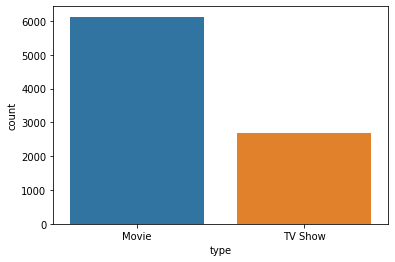

In [9]:
sns.countplot(df.type);
df.type.value_counts()/len(df)

In [10]:
# More Movies than TV shows which is a fact.

In [11]:
df.date_added=pd.to_datetime(df.date_added)
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [12]:
df['add_year']=df.date_added.dt.year
df['add_month']=df.date_added.dt.month
df['add_day']=df.date_added.dt.day
df=df.drop('date_added',axis=1)

In [13]:
df.groupby(['add_year'])['show_id'].count().reset_index(drop=False).rename(columns={'show_id':'show_count'})#.sort_values(by='show_count',ascending=True)

,add_year,show_count
0,2008.0,2
1,2009.0,2
2,2010.0,1
3,2011.0,13
4,2012.0,3
5,2013.0,11
6,2014.0,24
7,2015.0,82
8,2016.0,429
9,2017.0,1188


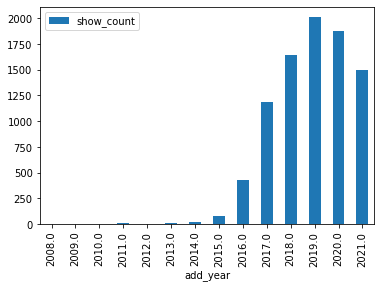

In [14]:
df.groupby(['add_year'])['show_id'].count().reset_index(drop=False).rename(columns={'show_id':'show_count'}).plot.bar(x='add_year',y='show_count');

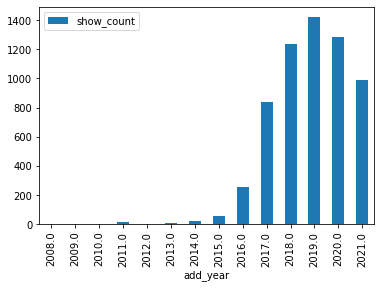

In [15]:
df[df['type']=='Movie'].groupby(['add_year'])['show_id'].count().reset_index(drop=False).rename(columns={'show_id':'show_count'}).plot.bar(x='add_year',y='show_count');

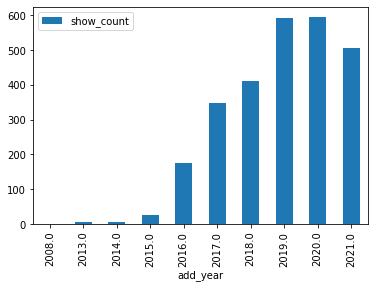

In [16]:
df[df['type']=='TV Show'].groupby(['add_year'])['show_id'].count().reset_index(drop=False).rename(columns={'show_id':'show_count'}).plot.bar(x='add_year',y='show_count');

In [17]:
df_add = df.groupby(['add_year','type'])['show_id'].count().reset_index(drop=False).rename(columns={'show_id':'show_count'})
df_add

,add_year,type,show_count
0,2008.0,Movie,1
1,2008.0,TV Show,1
2,2009.0,Movie,2
3,2010.0,Movie,1
4,2011.0,Movie,13
5,2012.0,Movie,3
6,2013.0,Movie,6
7,2013.0,TV Show,5
8,2014.0,Movie,19
9,2014.0,TV Show,5


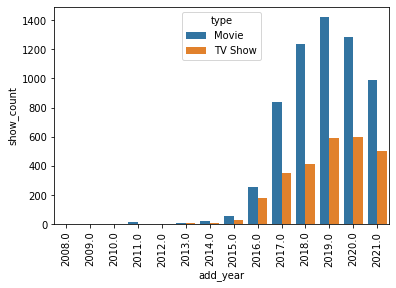

In [18]:
sns.barplot(x=df_add['add_year'], y=df_add['show_count'], hue=df_add['type']);
plt.xticks(rotation=90);

In [19]:
df.groupby(['release_year'])['show_id'].count().reset_index(drop=False).rename(columns={'show_id':'show_count'})#.sort_values(by='show_count',ascending=True)

,release_year,show_count
0,1925,1
1,1942,2
2,1943,3
3,1944,3
4,1945,4
...,...,...
69,2017,1032
70,2018,1145
71,2019,1029
72,2020,953


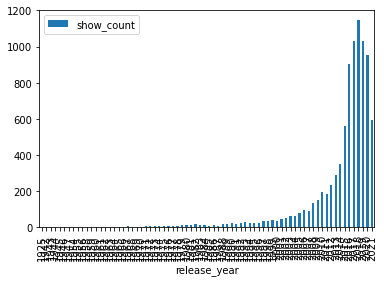

In [20]:
df.groupby(['release_year'])['show_id'].count().reset_index(drop=False).rename(columns={'show_id':'show_count'}).plot.bar(x='release_year',y='show_count');#.sort_values(by='show_count',ascending=True)

In [21]:
# 2019 max movies added 2020 max shows added
# Feb month is where least content is uploaded. One of the reason might be that the days are less as compared to other months
# 2010 year where least content is uploaded. 

In [22]:
df.release_year.loc[7109]=2010
df.release_year.loc[5658]=2015
df.release_year.loc[4845]=2003
df.release_year.loc[3168]=2016 
df.release_year.loc[3433]=2018
df.release_year.loc[7060]=2018
df.release_year.loc[3287]=2019
df.release_year.loc[2920]=2020
df.release_year.loc[4844]=2015   
df.release_year.loc[1551]=2018
df.release_year.loc[1696]=2018
df.release_year.loc[5394]=2016
df.release_year.loc[5677]=2016
df.release_year.loc[3369]=2014

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [23]:
df['time_bw_add_release']=df.add_year-df.release_year
df4=df[['title','time_bw_add_release']][df.time_bw_add_release.isnull()==False].sort_values(by='time_bw_add_release')
df4.head()

,title,time_bw_add_release
2106,Rust Valley Restorers,0.0
2190,The Umbrella Academy,0.0
5680,Captive,0.0
2192,Transformers: War For Cybertron Trilogy,0.0
2193,Uma Maheswara Ugra Roopasya,0.0


In [24]:
df4[df4.time_bw_add_release<0]

,title,time_bw_add_release


In [25]:
df4.sort_values(by='time_bw_add_release',ascending=False).head(20)

,title,time_bw_add_release
4250,Pioneers: First Women Filmmakers*,93.0
1331,Five Came Back: The Reference Films,76.0
7787,Prelude to War,75.0
8202,The Battle of Midway,75.0
8657,Undercover: How to Operate Behind Enemy Lines,74.0
8736,Why We Fight: The Battle of Russia,74.0
8760,WWII: Report from the Aleutians,74.0
8416,The Memphis Belle: A Story of a\nFlying Fortress,73.0
8637,Tunisian Victory,73.0
8433,The Negro Soldier,73.0


In [26]:
# Pioneers: First Women Filmmakers*,Five Came Back: The Reference Films,Prelude to War are the top 3 shows to have taken maximum
# time between release and its addition on netflix as they were from the 20 th century
# Max difference in years between release and addition on netflix is 93 years followed by 76 and 75 years while minimum 
# difference in years is 0 years

In [27]:
df.rating.value_counts()

TV-MA       3207
TV-14       2158
TV-PG        863
R            798
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: rating, dtype: int64

In [28]:
l=df[df.duration.isnull()==True].index
df.duration=df.duration.replace(np.NaN,'t',regex=False)
for x in l:
    df.duration.loc[x]=df.loc[x].rating
    df.rating.loc[x]=np.NaN
df.loc[l]

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,add_year,add_month,add_day,time_bw_add_release
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017,NaN,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi...",2017.0,4.0,4.0,0.0
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2010,NaN,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...,2016.0,9.0,16.0,6.0
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2015,NaN,66 min,Movies,The comic puts his trademark hilarious/thought...,2016.0,8.0,15.0,1.0


In [29]:
df.isnull().mean()[df.isnull().mean()!=0]

director               0.299069
cast                   0.093707
country                0.094275
rating                 0.000795
add_year               0.001136
add_month              0.001136
add_day                0.001136
time_bw_add_release    0.001136
dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


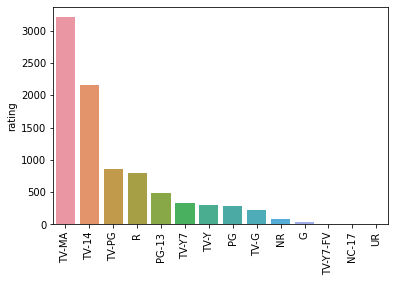

In [30]:
sns.barplot(df.rating.value_counts().index,df.rating.value_counts());
plt.xticks(rotation=90);

In [31]:
df.rating.value_counts()

TV-MA       3207
TV-14       2158
TV-PG        863
R            798
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: rating, dtype: int64

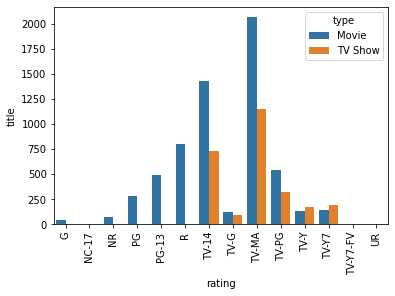

In [32]:
dfr = df.groupby(['rating','type'])[['title','time_bw_add_release']].count().reset_index(drop=False)
sns.barplot(x=dfr['rating'],y=dfr['title'],hue=dfr['type']);
plt.xticks(rotation=90);

In [33]:
df_yrwise = df[['type','add_year','add_month','title']]

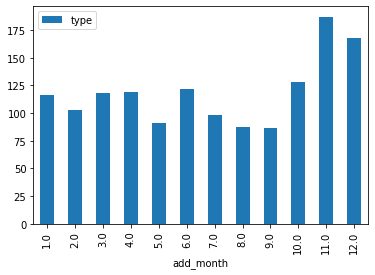

In [34]:
df_yrwise[(df['add_year']==2019)&(df['type']=='Movie')].reset_index(drop=True).groupby('add_month').count().reset_index(drop=False)[['add_month','type']].plot.bar('add_month','type');

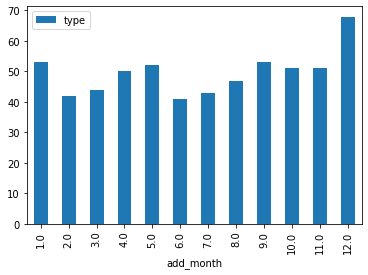

In [35]:
df_yrwise[(df['add_year']==2020)&(df['type']=='TV Show')].reset_index(drop=True).groupby('add_month').count().reset_index(drop=False)[['add_month','type']].plot.bar('add_month','type');

In [36]:
df.head()

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,add_year,add_month,add_day,time_bw_add_release
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0,9.0,25.0,1.0
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,9.0,24.0,0.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0,9.0,24.0,0.0
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021.0,9.0,24.0,0.0
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021.0,9.0,24.0,0.0


In [37]:
# Highest shows with rating TV-MA i.e. for adults followed by TV-14 i.e. for more than 14 years
# while lowest with UR i.e. universal rating

In [38]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'add_year', 'add_month', 'add_day', 'time_bw_add_release'],
      dtype='object')

In [39]:
for x in df.columns[1:6]:
    df[x]=df[x].str.strip()
for x in df.columns[8:11]:
    df[x]=df[x].str.strip()

In [40]:
df=pd.merge(df,df['country'].str.strip().dropna(),how='left',left_index=True,right_index=True)

In [41]:
df['country_x']=df['country_y']
df=df.drop('country_y',axis=1)
df=df.rename(columns={'country_x':'country'})
df=df.reset_index(drop=True)
df.shape

(8804, 15)

In [42]:
df=df[~(df.country=='')]
df=df.reset_index(drop=True)

In [43]:
df = df.dropna(subset=['country']).reset_index(drop=True)
df.head()

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,add_year,add_month,add_day,time_bw_add_release
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0,9.0,25.0,1.0
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,9.0,24.0,0.0
2,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021.0,9.0,24.0,0.0
3,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",2021.0,9.0,24.0,28.0
4,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,2021.0,9.0,24.0,0.0


In [44]:
df['country'] = df['country'].apply(lambda x: x.strip().split(','))

In [45]:
for i in range(len(df['country'])):
    if '' in df.iloc[i]['country']:
        df.iloc[i]['country'].remove('')

In [46]:
df_cw = df.explode('country').reset_index(drop=True)

In [47]:
df.shape

(7974, 15)

In [48]:
df_cw['country'] = df_cw['country'].apply(lambda x: x.strip())

In [49]:
country_count=df_cw['country'].value_counts().sort_values(ascending=False)
country_count=pd.DataFrame(country_count)
topcountries=country_count[0:]
topcountries

,country
United States,3689
India,1045
United Kingdom,806
Canada,445
France,393
...,...
Somalia,1
Panama,1
East Germany,1
Latvia,1


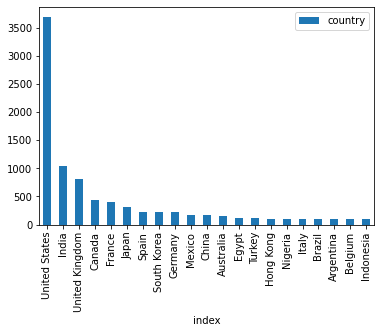

In [50]:
topcountries.reset_index(drop=False).iloc[:21].plot.bar(x='index',y='country');

In [51]:
movies = df[df['type']=='Movie']
movies = movies.reset_index(drop=True)
movies.head()

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,add_year,add_month,add_day,time_bw_add_release
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,[United States],2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0,9.0,25.0,1.0
1,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","[United States, Ghana, Burkina Faso, United...",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",2021.0,9.0,24.0,28.0
2,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",[United States],2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,2021.0,9.0,24.0,0.0
3,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis NiewÃ¶hner, Milan Peschel,...","[Germany, Czech Republic]",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,2021.0,9.0,23.0,0.0
4,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",[India],1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...,2021.0,9.0,21.0,23.0


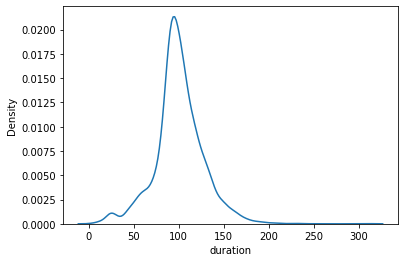

In [52]:
sns.kdeplot(movies['duration'].apply(lambda x: int(x.strip().split(' ')[0])));

In [53]:
df_cw_mov = df_cw[df_cw['type']=='Movie']
df_cw_mov = df_cw_mov.reset_index(drop=True)

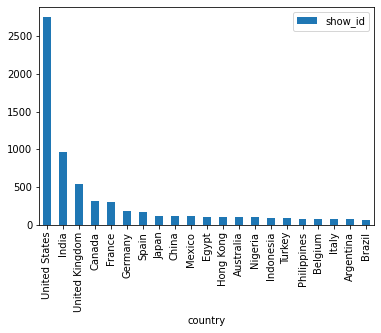

In [54]:
df_cw_mov.groupby('country').count()['show_id'].reset_index(drop=False).sort_values(by='show_id' ,ascending=False).reset_index(drop=True).iloc[:21].plot.bar(x='country',y='show_id');

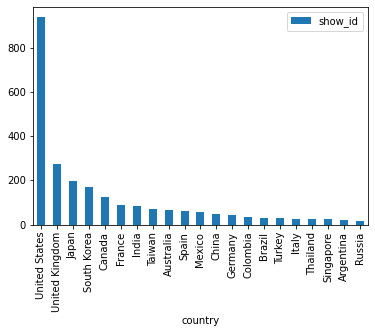

In [55]:
df_cw_tvs = df_cw[df_cw['type']=='TV Show']
df_cw_tvs = df_cw_tvs.reset_index(drop=True)
df_cw_tvs.groupby('country').count()['show_id'].reset_index(drop=False).sort_values(by='show_id' ,ascending=False).reset_index(drop=True).iloc[:21].plot.bar(x='country',y='show_id');

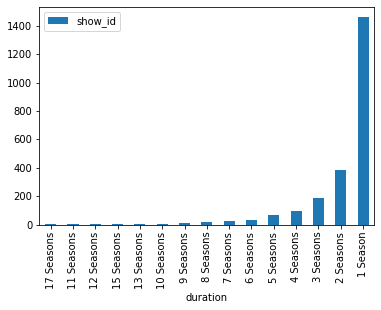

In [56]:
df[df['type']=='TV Show'].groupby('duration').count()['show_id'].reset_index(drop=False).sort_values(by='show_id').reset_index(drop=True).plot.bar(x='duration',y='show_id');

In [57]:
df[(df['type']=='TV Show')&(df['duration']=='17 Seasons')]['title'], df[(df['type']=='TV Show')&(df['duration']=='12 Seasons')]['title']

(359    Grey's Anatomy
 Name: title, dtype: object,
 4337    Trailer Park Boys
 4749       Criminal Minds
 Name: title, dtype: object)

In [58]:
df

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,add_year,add_month,add_day,time_bw_add_release
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,[United States],2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0,9.0,25.0,1.0
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",[South Africa],2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,9.0,24.0,0.0
2,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",[India],2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021.0,9.0,24.0,0.0
3,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","[United States, Ghana, Burkina Faso, United...",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",2021.0,9.0,24.0,28.0
4,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",[United Kingdom],2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,2021.0,9.0,24.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7969,s8799,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","[United Arab Emirates, Jordan]",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...,2016.0,3.0,9.0,1.0
7970,s8800,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",[United States],2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",2019.0,11.0,20.0,12.0
7971,s8802,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",[United States],2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,2019.0,11.0,1.0,10.0
7972,s8803,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",[United States],2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",2020.0,1.0,11.0,14.0


In [59]:
df.isnull().mean()[df.isnull().mean()!=0]

director               0.279032
cast                   0.084148
rating                 0.000752
add_year               0.001129
add_month              0.001129
add_day                0.001129
time_bw_add_release    0.001129
dtype: float64

In [60]:
df1.columns

Index(['imdb_title_id', 'title', 'original_title', 'year', 'date_published',
       'genre', 'duration', 'country', 'language', 'director', 'writer',
       'production_company', 'actors', 'description', 'avg_vote', 'votes',
       'budget', 'usa_gross_income', 'worlwide_gross_income', 'metascore',
       'reviews_from_users', 'reviews_from_critics'],
      dtype='object')

In [61]:
for x in df1.columns[:6]:
    df1[x]=df1[x].str.strip()
for x in df1.columns[7:14]:
    df1[x]=df1[x].str.strip()
for x in df1.columns[16:19]:
    df1[x]=df1[x].str.strip()
for x in df2.columns[0:1]:
    df2[x]=df2[x].str.strip()

In [62]:
df3=pd.merge(df1[['imdb_title_id','title','year','genre']],df2[['imdb_title_id','weighted_average_vote']],on='imdb_title_id').drop_duplicates().drop('imdb_title_id',axis=1)
imdb_netflix=pd.merge(df_cw,df3,how='inner',on='title').reset_index(drop=True)
imdb_netflix.groupby('genre').mean()['weighted_average_vote'].sort_values(ascending=False)

genre
Family, Musical               8.00
Action, Comedy, Thriller      8.00
Comedy, Musical, Drama        8.00
Mystery, Romance, Thriller    7.90
Drama, Romance, Musical       7.90
                              ... 
Action, Western               3.45
Family, Fantasy               3.10
Action, Crime, Horror         3.00
Comedy, Family, Sci-Fi        2.40
Fantasy, Horror, Sci-Fi       2.40
Name: weighted_average_vote, Length: 319, dtype: float64

In [63]:
imdb_netflix.groupby(['country','genre']).count()['show_id']

country    genre                    
Algeria    Drama                        1
Angola     Action                       1
Argentina  Action, Drama, Thriller      1
           Biography, Crime, Drama      1
           Biography, Drama, Romance    1
                                       ..
Vietnam    Comedy, Thriller             1
           Drama                        2
           Drama, Comedy                1
           Horror, Thriller             1
Zimbabwe   Comedy, Romance              1
Name: show_id, Length: 1453, dtype: int64

In [64]:
imdb_netflix=pd.merge(imdb_netflix,imdb_netflix.genre.str.strip(),how='left',left_index=True,right_index=True)
imdb_netflix=imdb_netflix.reset_index(drop=True)
imdb_netflix.head()

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,add_year,add_month,add_day,time_bw_add_release,year,genre_x,weighted_average_vote,genre_y
0,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...",United States,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",2021.0,9.0,24.0,28.0,NaN,Drama,6.9,Drama
1,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...",Ghana,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",2021.0,9.0,24.0,28.0,NaN,Drama,6.9,Drama
2,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...",Burkina Faso,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",2021.0,9.0,24.0,28.0,NaN,Drama,6.9,Drama
3,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...",United Kingdom,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",2021.0,9.0,24.0,28.0,NaN,Drama,6.9,Drama
4,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...",Germany,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",2021.0,9.0,24.0,28.0,NaN,Drama,6.9,Drama


In [65]:
imdb_netflix['genre_x']=imdb_netflix['genre_y']
imdb_netflix=imdb_netflix.drop('genre_y',axis=1)
imdb_netflix=imdb_netflix.rename(columns={'genre_x':'genre'})
imdb_netflix=imdb_netflix.reset_index(drop=True)
imdb_netflix.head()

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,add_year,add_month,add_day,time_bw_add_release,year,genre,weighted_average_vote
0,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...",United States,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",2021.0,9.0,24.0,28.0,NaN,Drama,6.9
1,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...",Ghana,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",2021.0,9.0,24.0,28.0,NaN,Drama,6.9
2,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...",Burkina Faso,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",2021.0,9.0,24.0,28.0,NaN,Drama,6.9
3,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...",United Kingdom,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",2021.0,9.0,24.0,28.0,NaN,Drama,6.9
4,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...",Germany,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",2021.0,9.0,24.0,28.0,NaN,Drama,6.9


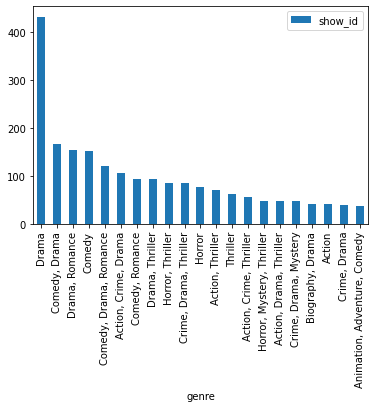

In [66]:
imdb_netflix.groupby('genre').count()['show_id'].reset_index(drop=False).sort_values(by='show_id', ascending=False).iloc[:21].plot.bar(x='genre',y='show_id');

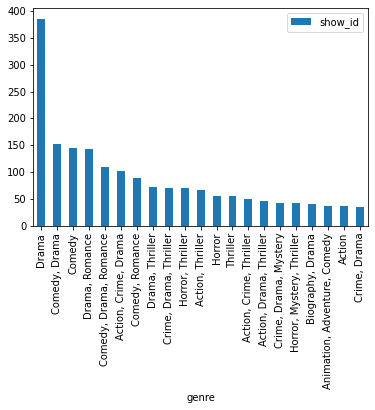

In [67]:
imdb_netflix_mov = imdb_netflix[imdb_netflix['type']=='Movie'].reset_index(drop=True)
imdb_netflix_mov.groupby('genre').count()['show_id'].reset_index(drop=False).sort_values(by='show_id', ascending=False).iloc[:21].plot.bar(x='genre',y='show_id');

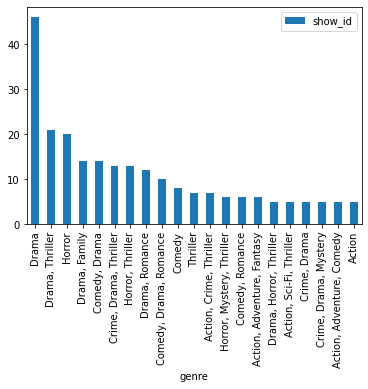

In [68]:
imdb_netflix_shows = imdb_netflix[imdb_netflix['type']=='TV Show'].reset_index(drop=True)
imdb_netflix_shows.groupby('genre').count()['show_id'].reset_index(drop=False).sort_values(by='show_id', ascending=False).iloc[:21].plot.bar(x='genre',y='show_id');

In [69]:
imdb_netflix.groupby(['country','genre']).count()['show_id'].reset_index(drop=False).groupby('country').max()

,genre,show_id
country,,
Algeria,Drama,1
Angola,Action,1
Argentina,"Drama, Thriller",5
Armenia,Comedy,1
Australia,"Mystery, Thriller",5
...,...,...
United States,Western,117
Uruguay,"Comedy, Drama",3
Venezuela,"Drama, History",1


In [70]:
imdb_netflix.groupby(['country']).count()['weighted_average_vote'].reset_index(drop=False).sort_values(by='weighted_average_vote',ascending=False)

,country,weighted_average_vote
76,United States,1223
31,India,771
75,United Kingdom,295
23,France,180
13,Canada,167
...,...,...
14,Cayman Islands,1
11,Burkina Faso,1
6,Bahamas,1
3,Armenia,1


In [71]:
imdb_netflix[(imdb_netflix['country']=='United States')&(imdb_netflix['type']=='Movie')].reset_index(drop=True).sort_values(by='release_year').drop_duplicates('title')

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,add_year,add_month,add_day,time_bw_add_release,year,genre,weighted_average_vote
803,s7292,Movie,Let There Be Light,John Huston,Walter Huston,United States,1946,TV-PG,58 min,"Classic Movies, Documentaries",Some returning combat veterans suffer scars th...,2017.0,3.0,31.0,71.0,2019,Drama,6.7
718,s6851,Movie,Gigi,"Vincente Minnelli, Charles Walters","Leslie Caron, Maurice Chevalier, Louis Jourdan...",United States,1958,G,115 min,"Classic Movies, Comedies, Music & Musicals",Gigi's an avant-garde French waif being groome...,2019.0,11.0,1.0,61.0,NaN,"Comedy, Musical, Romance",6.7
817,s7330,Movie,Lolita,Stanley Kubrick,"James Mason, Shelley Winters, Peter Sellers, S...",United States,1962,R,153 min,"Classic Movies, Dramas, Romantic Movies","In this black comedy, an English professor mar...",2019.0,11.0,1.0,57.0,NaN,"Drama, Romance",6.9
144,s1127,Movie,My Fair Lady,George Cukor,"Audrey Hepburn, Rex Harrison, Stanley Holloway...",United States,1964,G,173 min,"Classic Movies, Music & Musicals",When a Cockney flower girl takes elocution les...,2021.0,4.0,1.0,57.0,NaN,"Drama, Family, Musical",7.8
980,s8125,Movie,Superfly,Gordon Parks,"Ron O'Neal, Carl Lee, Sheila Frazier, Julius H...",United States,1972,R,91 min,"Action & Adventure, Classic Movies, Dramas","To get away from the thug life, cocaine dealer...",2019.0,11.0,1.0,47.0,2018,"Action, Crime, Thriller",5.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,s896,Movie,Oxygen,Alexandre Aja,"MÃ©lanie Laurent, Mathieu Amalric, Malik Zidi",United States,2021,TV-14,102 min,"Dramas, International Movies, Thrillers","After waking up in a cryogenic unit, Liz fight...",2021.0,5.0,12.0,0.0,NaN,"Crime, Drama, Thriller",6.1
164,s1375,Movie,Accomplice,Jeremy Grant,"Kurt Sorge, Tom Van Steenbergen, Cameron Zink,...",United States,2021,TV-14,52 min,"Documentaries, International Movies, Sports Mo...",Traverse the globe with the world's top riders...,2021.0,1.0,27.0,0.0,NaN,"Film-Noir, Mystery, Thriller",5.4
119,s911,Movie,Monster,Anthony Mandler,"Kelvin Harrison Jr., Jennifer Hudson, Jeffrey ...",United States,2021,TV-MA,99 min,Dramas,A talented teen implicated in a robbery-turned...,2021.0,5.0,7.0,0.0,2019,"Comedy, Drama, Family",6.8
78,s644,Movie,The Seventh Day,Justin P. Lange,"Guy Pearce, Vadhir Derbez, Stephen Lang, Brady...",United States,2021,R,87 min,Horror Movies,An inexperienced priest teams up with a harden...,2021.0,6.0,24.0,0.0,NaN,"Drama, Romance",5.9


In [72]:
imdb_netflix[(imdb_netflix['country']=='United States')&(imdb_netflix['type']=='TV Show')].reset_index(drop=True).sort_values(by='release_year').drop_duplicates('title')

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,add_year,add_month,add_day,time_bw_add_release,year,genre,weighted_average_vote
87,s6804,TV Show,Friends,NaN,"Jennifer Aniston, Courteney Cox, Lisa Kudrow, ...",United States,2003,TV-14,10 Seasons,"Classic & Cult TV, TV Comedies",This hit sitcom follows the merry misadventure...,NaN,NaN,NaN,NaN,NaN,"Comedy, Drama",7.5
28,s1549,TV Show,The Challenge,NaN,"Jamie Chung, Landon Lueck, Diem Brown, Mike 'T...",United States,2006,TV-14,2 Seasons,Reality TV,Reality show alumni must compete in grueling p...,2020.0,12.0,15.0,14.0,NaN,"Adventure, History, Romance",6.3
33,s1852,TV Show,One on One,NaN,"Flex Alexander, Kyla Pratt, Kelly Perine, Sici...",United States,2006,TV-14,5 Seasons,"TV Comedies, Teen TV Shows","When his ex-wife lands a job abroad, athlete-t...",2020.0,10.0,15.0,14.0,2014,"Crime, Drama, Thriller",5.7
94,s7123,TV Show,Jericho,NaN,"Skeet Ulrich, Lennie James, Ashley Scott, Kenn...",United States,2008,TV-14,2 Seasons,"Classic & Cult TV, TV Action & Adventure, TV D...",Jake returns to his Kansas town to collect an ...,2017.0,8.0,16.0,9.0,NaN,"Mystery, Western",6.1
16,s796,TV Show,Happy Endings,NaN,"Eliza Coupe, Elisha Cuthbert, Zachary Knighton...",United States,2012,TV-14,3 Seasons,TV Comedies,"After his fiancÃ©e, Alex, dumps him at the alt...",2021.0,6.0,2.0,9.0,NaN,"Comedy, Drama, Music",6.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17,s863,TV Show,Special,NaN,"Ryan O'Connell, Jessica Hecht, Punam Patel, Ma...",United States,2021,TV-MA,2 Seasons,TV Comedies,A young gay man with cerebral palsy branches o...,2021.0,5.0,20.0,0.0,NaN,"Comedy, Drama, Sci-Fi",6.9
18,s881,TV Show,Haunted,NaN,NaN,United States,2021,TV-MA,3 Seasons,"Reality TV, TV Horror, TV Thrillers",Real people sit down with friends and family t...,2021.0,5.0,14.0,0.0,NaN,Horror,3.6
23,s1232,TV Show,City of Ghosts,NaN,"August NuÃ±ez, Blue Chapman, Kirikou S'hai Mul...",United States,2021,TV-Y7,1 Season,Kids' TV,Meet the Ghost Club! Their adventures take the...,2021.0,3.0,5.0,0.0,NaN,"Crime, Drama, Thriller",6.0
9,s297,TV Show,Hit & Run,NaN,"Lior Raz, Kaelen Ohm, Sanaa Lathan, Moran Rose...",United States,2021,TV-MA,1 Season,"TV Action & Adventure, TV Dramas, TV Mysteries",A man searching for the truth behind his wife'...,2021.0,8.0,6.0,0.0,NaN,"Action, Comedy",6.2


In [73]:
netflix_india = imdb_netflix[(imdb_netflix['country']=='India')].drop_duplicates('title').reset_index(drop=True)
netflix_india

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,add_year,add_month,add_day,time_bw_add_release,year,genre,weighted_average_vote
0,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...,2021.0,9.0,21.0,23.0,NaN,"Comedy, Drama, Romance",6.5
1,s30,Movie,Paranoia,Robert Luketic,"Liam Hemsworth, Gary Oldman, Amber Heard, Harr...",India,2013,PG-13,106 min,Thrillers,"Blackmailed by his company's CEO, a low-level ...",2021.0,9.0,19.0,8.0,NaN,"Crime, Drama, Mystery",6.3
2,s106,Movie,Angamaly Diaries,Lijo Jose Pellissery,"Antony Varghese, Reshma Rajan, Binny Rinky Ben...",India,2017,TV-14,128 min,"Action & Adventure, Comedies, Dramas",After growing up amidst the gang wars of his h...,2021.0,9.0,5.0,4.0,2017,"Action, Comedy, Thriller",8.0
3,s115,Movie,Anjaam,Rahul Rawail,"Madhuri Dixit, Shah Rukh Khan, Tinnu Anand, Jo...",India,1994,TV-14,143 min,"Dramas, International Movies, Thrillers",A wealthy industrialistâ€™s dangerous obsessio...,2021.0,9.0,2.0,27.0,NaN,"Drama, Thriller",6.9
4,s117,Movie,Dhanak,Nagesh Kukunoor,"Krrish Chhabria, Hetal Gada, Vipin Sharma, Gul...",India,2015,TV-PG,114 min,"Comedies, Dramas, Independent Movies",A movie-loving 10-year-old and her blind littl...,2021.0,9.0,2.0,6.0,2015,Drama,7.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
639,s8770,Movie,Yamla Pagla Deewana 2,Sangeeth Sivan,"Dharmendra, Sunny Deol, Bobby Deol, Neha Sharm...",India,2013,TV-14,147 min,"Action & Adventure, Comedies, International Mo...","Up to his old tricks, con man Dharam poses as ...",2017.0,5.0,1.0,4.0,2013,"Action, Comedy",3.4
640,s8771,Movie,Yanda Kartavya Aahe,Kedar Shinde,"Ankush Choudhary, Smita Shewale, Mohan Joshi, ...",India,2006,TV-PG,151 min,"Comedies, Dramas, International Movies",Thanks to an arranged marriage that was design...,2018.0,1.0,1.0,12.0,NaN,"Comedy, Romance",6.6
641,s8796,Movie,Zed Plus,Chandra Prakash Dwivedi,"Adil Hussain, Mona Singh, K.K. Raina, Sanjay M...",India,2014,TV-MA,131 min,"Comedies, Dramas, International Movies",A philandering small-town mechanic's political...,2019.0,12.0,31.0,5.0,2014,Comedy,6.4
642,s8797,Movie,Zenda,Avadhoot Gupte,"Santosh Juvekar, Siddharth Chandekar, Sachit P...",India,2009,TV-14,120 min,"Dramas, International Movies",A change in the leadership of a political part...,2018.0,2.0,15.0,9.0,2009,Drama,7.0


In [74]:
netflix_india.sort_values(by='release_year')[['release_year','title']].reset_index(drop=True)

,release_year,title
0,1960,Singapore
1,1962,Professor
2,1964,Sangam
3,1966,Amrapali
4,1969,Prince
...,...,...
639,2021,The Big Day
640,2021,Bombay Rose
641,2021,The Girl on the Train
642,2021,The Disciple


In [75]:
netflix_india_mov = netflix_india[netflix_india['type']=='Movie']

In [76]:
netflix_india_mov.sort_values(by='release_year')

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,add_year,add_month,add_day,time_bw_add_release,year,genre,weighted_average_vote
403,s5221,Movie,Singapore,Shakti Samanta,"Shammi Kapoor, Padmini, Maria Menado, Shashika...",India,1960,TV-PG,158 min,"Comedies, Dramas, International Movies","When his employee disappears in Singapore, Shy...",2017.0,10.0,15.0,57.0,NaN,"Action, Adventure, Crime",6.5
409,s5401,Movie,Professor,Lekh Tandon,"Shammi Kapoor, Kalpana, Lalita Pawar, Parveen ...",India,1962,TV-PG,163 min,"Comedies, Dramas, International Movies",A college grad in need of money must disguise ...,2017.0,7.0,1.0,55.0,NaN,"Comedy, Drama, Musical",7.1
595,s7930,Movie,Sangam,Raj Kapoor,"Raj Kapoor, Vyjayanthimala, Rajendra Kumar, La...",India,1964,TV-14,228 min,"Classic Movies, Dramas, International Movies",Returning home from war after being assumed de...,2019.0,12.0,31.0,55.0,NaN,"Drama, Musical, Romance",7.5
406,s5392,Movie,Amrapali,Lekh Tandon,"Vyjayantimala, Sunil Dutt, Prem Nath, Bipin Gu...",India,1966,TV-PG,116 min,"Dramas, International Movies, Music & Musicals",In the age of Buddha and his philosophy of non...,2017.0,7.0,1.0,51.0,NaN,"Musical, Fantasy",6.7
414,s5462,Movie,Prince,Lekh Tandon,"Shammi Kapoor, Vyjayantimala, Rajendra Nath, A...",India,1969,TV-PG,152 min,"Dramas, International Movies, Romantic Movies","To better himself, a spoiled prince temporaril...",2017.0,6.0,1.0,48.0,NaN,"Action, Sci-Fi, Thriller",4.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,s2393,Movie,Axone,Nicholas Kharkongor,"Sayani Gupta, Lin Laishram, Tenzing Dalha, Dol...",India,2020,TV-MA,101 min,"Comedies, Dramas, Independent Movies","In Delhi, friends from Northeast India prepare...",2020.0,6.0,12.0,0.0,2019,"Comedy, Drama",7.0
37,s1282,Movie,Red,Tirumala Kishore,"Ram Pothineni, Nivetha Pethuraj, Malvika Sharm...",India,2021,TV-14,143 min,"Dramas, International Movies",A murder investigation leads police to a photo...,2021.0,2.0,23.0,0.0,NaN,"Drama, Thriller",7.0
36,s1266,Movie,The Girl on the Train,Ribhu Dasgupta,"Parineeti Chopra, Aditi Rao Hydari, Kirti Kulh...",India,2021,TV-MA,120 min,"International Movies, Thrillers",A troubled divorcÃ©e fixates on a seemingly id...,2021.0,2.0,26.0,0.0,2014,"Action, Thriller",4.3
35,s1229,Movie,Bombay Rose,Gitanjali Rao,"Cyli Khare, Gargi Shitole, Amardeep Jha, Amit ...",India,2021,PG-13,97 min,"Dramas, Independent Movies, International Movies",Amidst the bustle of a magnetic and multifacet...,2021.0,3.0,8.0,0.0,2019,"Animation, Drama, Romance",6.4


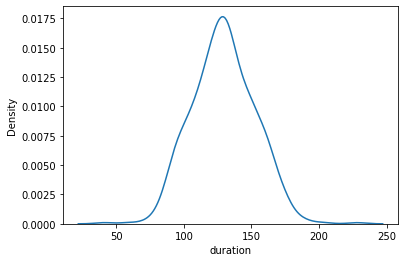

In [77]:
sns.kdeplot(netflix_india_mov['duration'].apply(lambda x: int(x.strip().split(' ')[0])));

In [78]:
netflix_india_mov.groupby('genre').count()['show_id'].reset_index(drop=False).sort_values(by='show_id',ascending=False)

,genre,show_id
87,Drama,82
59,"Comedy, Drama, Romance",41
53,"Comedy, Drama",35
16,"Action, Crime, Drama",32
105,"Drama, Romance",30
...,...,...
65,"Comedy, Horror, Mystery",1
63,"Comedy, Family, Romance",1
60,"Comedy, Drama, Sci-Fi",1
56,"Comedy, Drama, Horror",1


In [79]:
netflix_india_series = netflix_india[netflix_india['type']=='TV Show'].drop_duplicates(subset=['title'])

In [80]:
netflix_india_series.sort_values(by='release_year')

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,add_year,add_month,add_day,time_bw_add_release,year,genre,weighted_average_vote
573,s7757,TV Show,Powder,NaN,"Manish Chaudhary, Pankaj Tripathi, Geetika Tya...",India,2010,TV-14,1 Season,"Crime TV Shows, International TV Shows, TV Dramas",Two men who grew up in Mumbai's slums are draw...,2018.0,2.0,15.0,8.0,NaN,Drama,4.3
585,s7833,TV Show,Razia Sultan,NaN,"Pankhuri Awasthy, Saurabh Pandey, Rohit Purohi...",India,2015,TV-14,1 Season,"International TV Shows, Romantic TV Shows, TV ...",This sweeping historical drama charts the rise...,2017.0,4.0,1.0,2.0,NaN,"Biography, Drama, History",6.3
614,s8233,TV Show,The Calling,Bumpy,NaN,India,2018,TV-MA,1 Season,"International TV Shows, Reality TV",Food-crazed travel junkies journey across Indi...,2019.0,4.0,1.0,1.0,NaN,Drama,4.9
214,s3751,TV Show,Leila,NaN,"Huma Qureshi, Siddharth, Rahul Khanna, Arif Za...",India,2019,TV-MA,1 Season,"British TV Shows, International TV Shows, TV D...",In a near-future world where an oppressive reg...,2019.0,6.0,14.0,0.0,NaN,"Drama, Family, Romance",7.6
613,s8171,TV Show,Thackeray,NaN,NaN,India,2019,TV-MA,1 Season,TV Shows,From controversial cartoonist to powerful Mumb...,2019.0,5.0,25.0,0.0,2019,"Biography, Drama",5.2
145,s2793,TV Show,She,NaN,"Aaditi Pohankar, Vijay Varma, Vishwas Kini, Ki...",India,2020,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas",An undercover assignment to expose a drug ring...,2020.0,3.0,20.0,0.0,NaN,"Adventure, Fantasy, Sci-Fi",6.1
31,s1094,TV Show,The Big Day,NaN,NaN,India,2021,TV-14,2 Seasons,"International TV Shows, Reality TV, Romantic T...","For six engaged couples, happily ever after be...",2021.0,4.0,7.0,0.0,NaN,Comedy,4.6


In [81]:
netflix_india_series['duration']

31     2 Seasons
145     1 Season
214     1 Season
573     1 Season
585     1 Season
613     1 Season
614     1 Season
Name: duration, dtype: object

In [82]:
netflix_india_series.groupby('genre').count()['show_id'].reset_index(drop=False).sort_values(by='show_id',ascending=False)

,genre,show_id
4,Drama,2
0,"Adventure, Fantasy, Sci-Fi",1
1,"Biography, Drama",1
2,"Biography, Drama, History",1
3,Comedy,1
5,"Drama, Family, Romance",1


In [83]:
imdb_netflix.isnull().mean()

show_id                  0.000000
type                     0.000000
title                    0.000000
director                 0.097307
cast                     0.021328
country                  0.000000
release_year             0.000000
rating                   0.000267
duration                 0.000000
listed_in                0.000000
description              0.000000
add_year                 0.000533
add_month                0.000533
add_day                  0.000533
time_bw_add_release      0.000533
year                     0.498800
genre                    0.000000
weighted_average_vote    0.000000
dtype: float64

In [84]:
imdb_netflix[imdb_netflix.rating.isnull()==True]

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,add_year,add_month,add_day,time_bw_add_release,year,genre,weighted_average_vote
3095,s7535,Movie,My Honor Was Loyalty,Alessandro Pepe,"Leone Frisa, Paolo Vaccarino, Francesco Miglio...",Italy,2015,NaN,115 min,Dramas,"Amid the chaos and horror of World War II, a c...",2017.0,3.0,1.0,2.0,2016,"Drama, War",4.4


In [85]:
imdb_netflix.drop_duplicates(subset=['title']).genre.value_counts()

Drama                          259
Comedy                         119
Comedy, Drama                  111
Drama, Romance                 107
Comedy, Drama, Romance          95
                              ... 
Comedy, Drama, History           1
Romance, Thriller                1
Comedy, Horror, Sci-Fi           1
Fantasy, Horror, Sci-Fi          1
Adventure, Biography, Crime      1
Name: genre, Length: 301, dtype: int64

In [86]:
imdb_netflix.sort_values(by='weighted_average_vote',ascending=False)[['title','country','weighted_average_vote']].drop_duplicates('title').iloc[:20]

,title,country,weighted_average_vote
1513,Innocent,Turkey,9.0
3200,Pulp Fiction,United States,8.9
3303,Schindler's List,United States,8.9
105,Inception,United Kingdom,8.8
2935,Koshish,India,8.6
2639,Eh Janam Tumhare Lekhe,India,8.6
2536,City of God,Germany,8.6
2732,Gol Maal,India,8.6
633,Ani... Dr. Kashinath Ghanekar,India,8.6
1200,Oththa Seruppu Size 7,India,8.6


In [87]:
# Top rated movie is Innocent from Turkey with 9/10 rating as well as Breakout from unknown country with 9/10. 
# This is followed by Pulp fiction and Schindler's List at 8.9/10 ratings.
# Top rated Indian movies are Gol Maal,Oththa Seruppu Size 7,Koshish,Ani... Dr. Kashinath Ghanekar,Eh Janam Tumhare Lekhe at 8.6/10 ratings.

In [88]:
mvr_c=imdb_netflix.sort_values(by='weighted_average_vote',ascending=False)[imdb_netflix.sort_values(by='weighted_average_vote',ascending=False).country.isnull()==False][['title','country','genre','weighted_average_vote']]
mvr_c[mvr_c.weighted_average_vote>8]

,title,country,genre,weighted_average_vote
1513,Innocent,Turkey,Comedy,9.0
3200,Pulp Fiction,United States,"Crime, Drama",8.9
3303,Schindler's List,United States,"Biography, Drama, History",8.9
105,Inception,United Kingdom,"Action, Adventure, Sci-Fi",8.8
104,Inception,United States,"Action, Adventure, Sci-Fi",8.8
...,...,...,...,...
974,Aurora,Romania,"Drama, Romance",8.1
988,Aurora,Switzerland,"Drama, Romance",8.1
1146,Zindagi Na Milegi Dobara,India,"Comedy, Drama",8.1
981,Aurora,France,"Drama, Romance",8.1


In [89]:
imdb_netflix.groupby('country').get_group('India')

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,add_year,add_month,add_day,time_bw_add_release,year,genre,weighted_average_vote
7,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...,2021.0,9.0,21.0,23.0,NaN,"Comedy, Drama, Romance",6.5
10,s30,Movie,Paranoia,Robert Luketic,"Liam Hemsworth, Gary Oldman, Amber Heard, Harr...",India,2013,PG-13,106 min,Thrillers,"Blackmailed by his company's CEO, a low-level ...",2021.0,9.0,19.0,8.0,NaN,"Crime, Drama, Mystery",6.3
11,s30,Movie,Paranoia,Robert Luketic,"Liam Hemsworth, Gary Oldman, Amber Heard, Harr...",India,2013,PG-13,106 min,Thrillers,"Blackmailed by his company's CEO, a low-level ...",2021.0,9.0,19.0,8.0,NaN,"Drama, Thriller",4.9
29,s106,Movie,Angamaly Diaries,Lijo Jose Pellissery,"Antony Varghese, Reshma Rajan, Binny Rinky Ben...",India,2017,TV-14,128 min,"Action & Adventure, Comedies, Dramas",After growing up amidst the gang wars of his h...,2021.0,9.0,5.0,4.0,2017,"Action, Comedy, Thriller",8.0
30,s115,Movie,Anjaam,Rahul Rawail,"Madhuri Dixit, Shah Rukh Khan, Tinnu Anand, Jo...",India,1994,TV-14,143 min,"Dramas, International Movies, Thrillers",A wealthy industrialistâ€™s dangerous obsessio...,2021.0,9.0,2.0,27.0,NaN,"Drama, Thriller",6.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3735,s8770,Movie,Yamla Pagla Deewana 2,Sangeeth Sivan,"Dharmendra, Sunny Deol, Bobby Deol, Neha Sharm...",India,2013,TV-14,147 min,"Action & Adventure, Comedies, International Mo...","Up to his old tricks, con man Dharam poses as ...",2017.0,5.0,1.0,4.0,2013,"Action, Comedy",3.4
3736,s8771,Movie,Yanda Kartavya Aahe,Kedar Shinde,"Ankush Choudhary, Smita Shewale, Mohan Joshi, ...",India,2006,TV-PG,151 min,"Comedies, Dramas, International Movies",Thanks to an arranged marriage that was design...,2018.0,1.0,1.0,12.0,NaN,"Comedy, Romance",6.6
3743,s8796,Movie,Zed Plus,Chandra Prakash Dwivedi,"Adil Hussain, Mona Singh, K.K. Raina, Sanjay M...",India,2014,TV-MA,131 min,"Comedies, Dramas, International Movies",A philandering small-town mechanic's political...,2019.0,12.0,31.0,5.0,2014,Comedy,6.4
3744,s8797,Movie,Zenda,Avadhoot Gupte,"Santosh Juvekar, Siddharth Chandekar, Sachit P...",India,2009,TV-14,120 min,"Dramas, International Movies",A change in the leadership of a political part...,2018.0,2.0,15.0,9.0,2009,Drama,7.0


In [90]:
mvr_c1=imdb_netflix.groupby('country')['show_id'].count().sort_values(ascending=False).reset_index(drop=False)
mvr_c1.head()

,country,show_id
0,United States,1223
1,India,771
2,United Kingdom,295
3,France,180
4,Canada,167


In [91]:
mvr_c1=pd.merge(mvr_c1.country.str.strip(),mvr_c1,left_index=True,right_index=True,how='left')

In [92]:
mvr_c1=mvr_c1.reset_index(drop=True)
mvr_c1

,country_x,country_y,show_id
0,United States,United States,1223
1,India,India,771
2,United Kingdom,United Kingdom,295
3,France,France,180
4,Canada,Canada,167
...,...,...,...
76,Cayman Islands,Cayman Islands,1
77,Burkina Faso,Burkina Faso,1
78,Bahamas,Bahamas,1
79,Armenia,Armenia,1


In [93]:
mvr_c1.groupby('country_x').sum().sort_values(by='show_id',ascending=False)

,show_id
country_x,
United States,1223
India,771
United Kingdom,295
France,180
Canada,167
...,...
Cayman Islands,1
Burkina Faso,1
Bahamas,1


In [94]:
# Maximum movies and tv sources have their origin from United States followed by India and UK on netflix.

In [95]:
df.groupby('type').get_group('Movie').release_year.value_counts().reset_index(drop=False).rename(columns={'index':'release_year','release_year':'count'}).astype('int64').iloc[:20]

,release_year,count
0,2017,730
1,2018,712
2,2016,639
3,2019,563
4,2020,461
5,2015,376
6,2014,252
7,2013,212
8,2021,169
9,2012,167


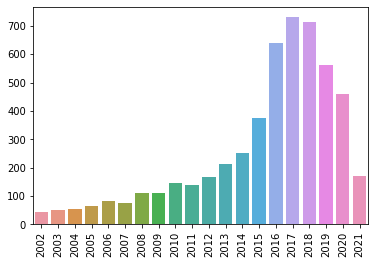

In [96]:
sns.barplot(x=df.groupby('type').get_group('Movie').release_year.value_counts().reset_index(drop=False).rename(columns={'index':'release_year','release_year':'count'}).astype('int64').iloc[:20].release_year.tolist(),
            y=df.groupby('type').get_group('Movie').release_year.value_counts().reset_index(drop=False).rename(columns={'index':'release_year','release_year':'count'}).astype('int64').iloc[:20]['count'].tolist());
plt.xticks(rotation=90);

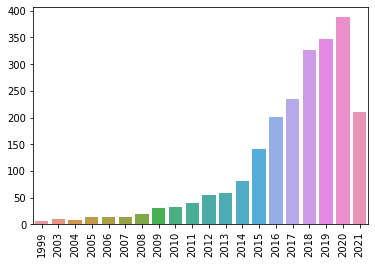

In [97]:
sns.barplot(x=df.groupby('type').get_group('TV Show').release_year.value_counts().reset_index(drop=False).rename(columns={'index':'release_year','release_year':'count'}).astype('int64').iloc[:20].release_year.tolist(),
            y=df.groupby('type').get_group('TV Show').release_year.value_counts().reset_index(drop=False).rename(columns={'index':'release_year','release_year':'count'}).astype('int64').iloc[:20]['count'].tolist());
plt.xticks(rotation=90);

In [98]:
# Movies maximum release in 2017 and shows maximum released in 2020 (Lockdown may be the reason)

In [99]:
df_cw.groupby('type').get_group('Movie').country.fillna("Missing").str.strip().reset_index(drop=True).value_counts()

United States     2751
India              961
United Kingdom     534
Canada             319
France             303
                  ... 
Ecuador              1
Armenia              1
Mongolia             1
Bahamas              1
Montenegro           1
Name: country, Length: 117, dtype: int64

In [100]:
# Maximum content creation for movies is from US followed by India and UK

In [101]:
nm=df_cw.groupby('type').get_group('Movie')
nm=nm.reset_index(drop=True)

In [102]:
ns=df_cw.groupby('type').get_group('TV Show')
ns=ns.reset_index(drop=True)

In [103]:
ns.country.str.strip().dropna().str.strip().reset_index(drop=True).value_counts()

United States           938
United Kingdom          272
Japan                   199
South Korea             170
Canada                  126
                       ... 
Malta                     1
Senegal                   1
Uruguay                   1
United Arab Emirates      1
Switzerland               1
Name: country, Length: 65, dtype: int64

In [104]:
# Maximum content creation for tv shows is from US followed by UK and Japan

In [105]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'add_year', 'add_month', 'add_day', 'time_bw_add_release'],
      dtype='object')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


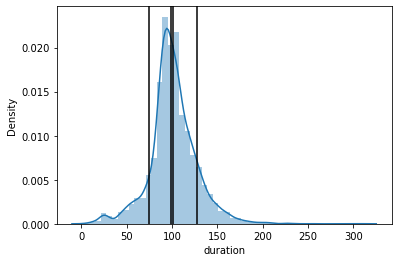

In [106]:
nm.duration=nm.duration.str.split(' ').apply(lambda x: x[0]).astype('float64')
sns.distplot(nm.duration);
plt.axvline(nm.duration.mean(),color='black');
plt.axvline(nm.duration.median(),color='black');
plt.axvline(nm.duration.mean()+nm.duration.std(),color='black');
plt.axvline(nm.duration.mean()-nm.duration.std(),color='black');

In [107]:
# Maximum movies are of duration 75 to 120 minutes as prefered by the audience

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


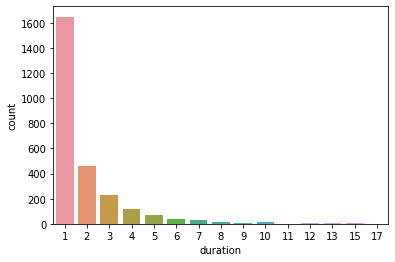

In [108]:
ns.duration=ns.duration.str.strip().str.split(' ',).apply(lambda x:x[0]).astype('int64')
sns.countplot(ns.duration);

In [109]:
# Maximum shows are of duration single season as prefered by the audience

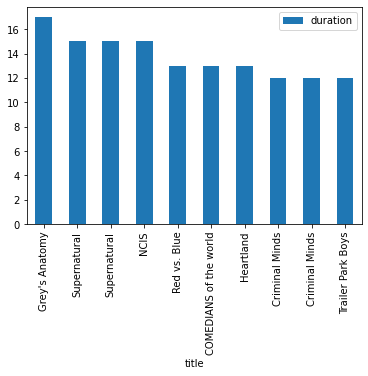

In [110]:
ns.sort_values(by='duration',ascending=False)[['title','duration']].iloc[:10].set_index('title').plot(kind='bar');

In [111]:
# Maximum seasons are of tv show Grey's Anatomy followed by Supernatural, NCIS which are of 17, 15 and 15 seasons respectively

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


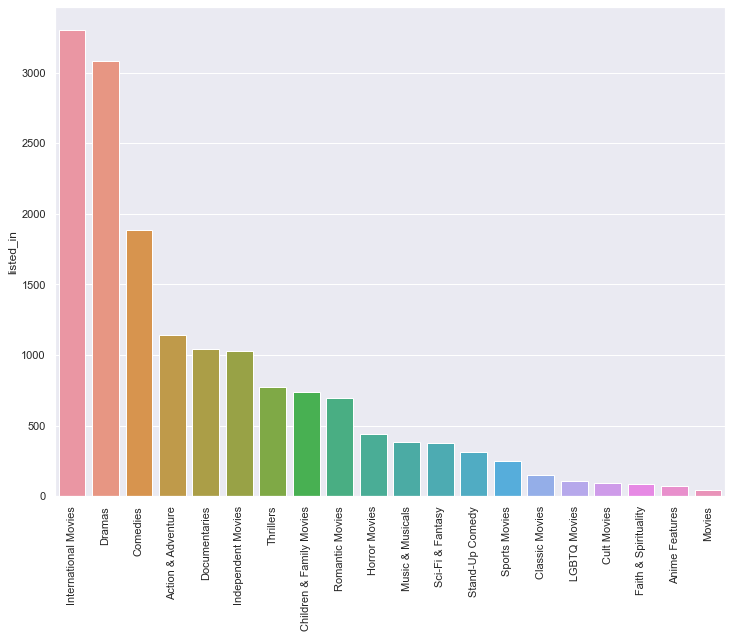

In [112]:
sns.set(rc={'figure.figsize':(12,9)})
sns.barplot(nm.listed_in.str.strip().str.split(',').explode().str.strip().value_counts().index,
            nm.listed_in.str.strip().str.split(',').explode().str.strip().value_counts());
plt.xticks(rotation=90);

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


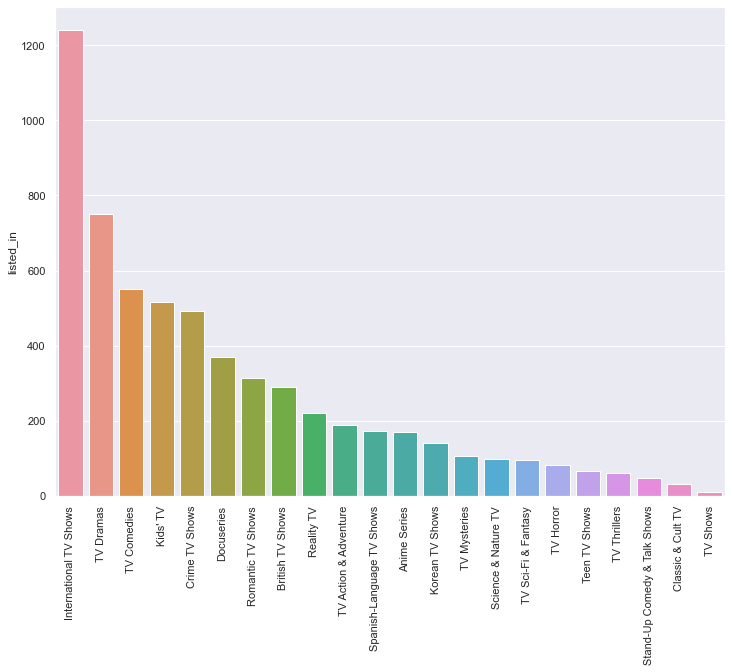

In [113]:
sns.set(rc={'figure.figsize':(12,9)})
sns.barplot(ns.listed_in.str.strip().str.split(',').explode().str.strip().value_counts().index,
            ns.listed_in.str.strip().str.split(',').explode().str.strip().value_counts());
plt.xticks(rotation=90);

In [114]:
# Maximum shows and movies are international tv shows and movies followed by dramas and comedies.

In [115]:
# This was the recommendation based on content of the movie or the show i.e. content based filtering is used.

In [116]:
df3 = df3.drop_duplicates(subset=['title'], keep='last').reset_index(drop=True)

In [117]:
df3[df3.title=='Zoom']

,title,year,genre,weighted_average_vote
68923,Zoom,2015,"Animation, Comedy, Drama",6.1


In [118]:
mer=pd.merge(df_cw,df3,how='left',on=['title'])
mer['weighted_average_vote']=mer['weighted_average_vote'].replace(np.NaN,0,regex=False)

In [119]:
mer_nm=mer.groupby('type').get_group('Movie')
mer_ns=mer.groupby('type').get_group('TV Show')

In [120]:
mer_nm=pd.merge(mer_nm,mer_nm.country.dropna().str.strip(),how='left',left_index=True,right_index=True)

In [121]:
mer_nm

,show_id,type,title,director,cast,country_x,release_year,rating,duration,listed_in,description,add_year,add_month,add_day,time_bw_add_release,year,genre,weighted_average_vote,country_y
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0,9.0,25.0,1.0,NaN,NaN,0.0,United States
3,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...",United States,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",2021.0,9.0,24.0,28.0,NaN,Drama,6.9,United States
4,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...",Ghana,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",2021.0,9.0,24.0,28.0,NaN,Drama,6.9,Ghana
5,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...",Burkina Faso,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",2021.0,9.0,24.0,28.0,NaN,Drama,6.9,Burkina Faso
6,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...",United Kingdom,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",2021.0,9.0,24.0,28.0,NaN,Drama,6.9,United Kingdom
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10003,s8799,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...",Jordan,2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...,2016.0,3.0,9.0,1.0,2015,"Crime, Drama, Thriller",6.7,Jordan
10004,s8800,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",2019.0,11.0,20.0,12.0,NaN,"Crime, Drama, Mystery",7.7,United States
10005,s8802,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,2019.0,11.0,1.0,10.0,NaN,NaN,0.0,United States
10006,s8803,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",2020.0,1.0,11.0,14.0,2015,"Animation, Comedy, Drama",6.1,United States


In [122]:
mer_nm.country_x=mer_nm.country_y
mer_nm=mer_nm.rename(columns={'country_x':'country'})
mer_nm=mer_nm.drop('country_y',axis=1)
mer_nm=mer_nm[mer_nm.country!='']
mer_nm=mer_nm.reset_index(drop=True)

In [123]:
cwv=mer_nm.groupby(['country','title'])['weighted_average_vote'].max().reset_index().sort_values(by='weighted_average_vote',ascending=False).sort_values(by=['country','weighted_average_vote'])
cwv[cwv.country=='India'].sort_values(by='weighted_average_vote')

,country,title,weighted_average_vote
2178,India,Motu Patlu: King of Kings,0.0
1967,India,I Hate Luv Storys,0.0
1969,India,INDIA,0.0
1948,India,High End Yaariyan,0.0
1751,India,Bollywood Calling,0.0
...,...,...,...
2061,India,Koshish,8.6
1865,India,Eh Janam Tumhare Lekhe,8.6
1910,India,Gol Maal,8.6
1681,India,Ani... Dr. Kashinath Ghanekar,8.6


In [124]:
mer_nm.genre=mer_nm.genre.replace(np.NaN,'',regex=False)

In [125]:
tg=mer_nm.listed_in.str.strip().unique().tolist()+mer_nm.genre.str.strip().unique().tolist()

In [126]:
mer_nm['tg']=mer_nm['listed_in']+', '+ mer_nm['genre']

In [127]:
stg=mer_nm.tg.str.strip().str.split(',').explode().str.strip().str.split('&').explode().str.strip().str.strip().str.split(' ').apply(lambda x:x[0])

In [128]:
stg=stg.replace({'Comedies':'Comedy','Dramas':'Drama','Romantic':'Romance','Thrillers':'Thriller','Sports':'Sport','Musicals':'Musical','Music':'Musical'})

In [129]:
stg=stg[stg!='']
stg

0       Documentaries
1               Drama
1         Independent
1       International
1               Drama
            ...      
7368            Drama
7368    International
7368          Musical
7368          Musical
7368            Drama
Name: tg, Length: 25000, dtype: object

In [130]:
stg=stg.to_frame('g')
stg=stg.reset_index().rename(columns={'index':'gpb'}).groupby(['gpb','g']).count().reset_index().set_index('gpb')
stg=stg.reset_index().groupby('gpb').agg(lambda x: x.tolist()).g.apply(lambda x: ','.join(x)).to_frame('g')
stg=pd.merge(stg,stg.g.str.strip().str.split(',').explode(),how='left',left_index=True,right_index=True).rename(columns=
                                                                                                        {'g_x':'cg','g_y':'g'})
stg.g.unique()

array(['Documentaries', 'Drama', 'Independent', 'International', 'Comedy',
       'Romance', 'Fantasy', 'Horror', 'Sci-Fi', 'Thriller', 'Action',
       'Adventure', 'Classic', 'Crime', 'Anime', 'Children', 'Family',
       'Musical', 'Sport', 'Biography', 'Mystery', 'Cult', 'War',
       'Animation', 'Faith', 'Spirituality', 'LGBTQ', 'Western',
       'History', 'Stand-Up', 'Movies', 'Film-Noir'], dtype=object)

In [131]:
mer_nm=pd.merge(mer_nm,stg,left_index=True,right_index=True,how='left')
mer_nm=mer_nm.reset_index(drop=True)
mer_nm

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,add_year,add_month,add_day,time_bw_add_release,year,genre,weighted_average_vote,tg,cg,g
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0,9.0,25.0,1.0,NaN,,0.0,"Documentaries,",Documentaries,Documentaries
1,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...",United States,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",2021.0,9.0,24.0,28.0,NaN,Drama,6.9,"Dramas, Independent Movies, International Movi...","Drama,Independent,International",Drama
2,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...",United States,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",2021.0,9.0,24.0,28.0,NaN,Drama,6.9,"Dramas, Independent Movies, International Movi...","Drama,Independent,International",Independent
3,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...",United States,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",2021.0,9.0,24.0,28.0,NaN,Drama,6.9,"Dramas, Independent Movies, International Movi...","Drama,Independent,International",International
4,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...",Ghana,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",2021.0,9.0,24.0,28.0,NaN,Drama,6.9,"Dramas, Independent Movies, International Movi...","Drama,Independent,International",Drama
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21162,s8803,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",2020.0,1.0,11.0,14.0,2015,"Animation, Comedy, Drama",6.1,"Children & Family Movies, Comedies, Animation,...","Animation,Children,Comedy,Drama,Family",Drama
21163,s8803,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",2020.0,1.0,11.0,14.0,2015,"Animation, Comedy, Drama",6.1,"Children & Family Movies, Comedies, Animation,...","Animation,Children,Comedy,Drama,Family",Family
21164,s8804,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,2019.0,3.0,2.0,4.0,2015,Drama,6.2,"Dramas, International Movies, Music & Musicals...","Drama,International,Musical",Drama
21165,s8804,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,2019.0,3.0,2.0,4.0,2015,Drama,6.2,"Dramas, International Movies, Music & Musicals...","Drama,International,Musical",International


In [132]:
mer_nm=mer_nm.drop(['listed_in','genre','tg'],axis=1)
mer_nm=mer_nm.rename(columns={'g':'genre','cg':'combined_genre'})
mer_nm

,show_id,type,title,director,cast,country,release_year,rating,duration,description,add_year,add_month,add_day,time_bw_add_release,year,weighted_average_vote,combined_genre,genre
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2020,PG-13,90 min,"As her father nears the end of his life, filmm...",2021.0,9.0,25.0,1.0,NaN,0.0,Documentaries,Documentaries
1,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...",United States,1993,TV-MA,125 min,"On a photo shoot in Ghana, an American model s...",2021.0,9.0,24.0,28.0,NaN,6.9,"Drama,Independent,International",Drama
2,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...",United States,1993,TV-MA,125 min,"On a photo shoot in Ghana, an American model s...",2021.0,9.0,24.0,28.0,NaN,6.9,"Drama,Independent,International",Independent
3,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...",United States,1993,TV-MA,125 min,"On a photo shoot in Ghana, an American model s...",2021.0,9.0,24.0,28.0,NaN,6.9,"Drama,Independent,International",International
4,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...",Ghana,1993,TV-MA,125 min,"On a photo shoot in Ghana, an American model s...",2021.0,9.0,24.0,28.0,NaN,6.9,"Drama,Independent,International",Drama
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21162,s8803,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2006,PG,88 min,"Dragged from civilian life, a former superhero...",2020.0,1.0,11.0,14.0,2015,6.1,"Animation,Children,Comedy,Drama,Family",Drama
21163,s8803,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2006,PG,88 min,"Dragged from civilian life, a former superhero...",2020.0,1.0,11.0,14.0,2015,6.1,"Animation,Children,Comedy,Drama,Family",Family
21164,s8804,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...,2019.0,3.0,2.0,4.0,2015,6.2,"Drama,International,Musical",Drama
21165,s8804,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...,2019.0,3.0,2.0,4.0,2015,6.2,"Drama,International,Musical",International


In [133]:
mer_nm.groupby(["combined_genre","country"])['weighted_average_vote'].max().reset_index().sort_values(by='weighted_average_vote',ascending=False).reset_index().rename(columns={'index':'title'})

,title,combined_genre,country,weighted_average_vote
0,1046,"Classic,Crime,Cult,Drama",United States,8.9
1,753,"Biography,Classic,Drama,History",United States,8.9
2,446,"Action,Adventure,Fantasy,Sci-Fi,Thriller",United Kingdom,8.8
3,447,"Action,Adventure,Fantasy,Sci-Fi,Thriller",United States,8.8
4,1238,"Comedy,Drama,Independent,International,Romance",France,8.6
...,...,...,...,...
2654,1757,"Documentaries,International",Serbia,0.0
2655,1756,"Documentaries,International",Russia,0.0
2656,1755,"Documentaries,International",Qatar,0.0
2657,1754,"Documentaries,International",Peru,0.0


In [134]:
mer_nm['add_year'].unique()

array([2021., 2020., 2019., 2018., 2017., 2016., 2015., 2014., 2013.,
       2012., 2011., 2009., 2008., 2010.])

In [135]:
mer_nm.duration=mer_nm.duration.apply(lambda x:float(x.strip().split(' ')[0]))
mer_nm=mer_nm.reset_index(drop=True)

In [136]:
movies_on_netflix=mer_nm[['title','director','cast','country','release_year','duration','rating','add_year','weighted_average_vote','combined_genre','genre','description']]
movies_on_netflix

,title,director,cast,country,release_year,duration,rating,add_year,weighted_average_vote,combined_genre,genre,description
0,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2020,90.0,PG-13,2021.0,0.0,Documentaries,Documentaries,"As her father nears the end of his life, filmm..."
1,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...",United States,1993,125.0,TV-MA,2021.0,6.9,"Drama,Independent,International",Drama,"On a photo shoot in Ghana, an American model s..."
2,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...",United States,1993,125.0,TV-MA,2021.0,6.9,"Drama,Independent,International",Independent,"On a photo shoot in Ghana, an American model s..."
3,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...",United States,1993,125.0,TV-MA,2021.0,6.9,"Drama,Independent,International",International,"On a photo shoot in Ghana, an American model s..."
4,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...",Ghana,1993,125.0,TV-MA,2021.0,6.9,"Drama,Independent,International",Drama,"On a photo shoot in Ghana, an American model s..."
...,...,...,...,...,...,...,...,...,...,...,...,...
21162,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2006,88.0,PG,2020.0,6.1,"Animation,Children,Comedy,Drama,Family",Drama,"Dragged from civilian life, a former superhero..."
21163,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2006,88.0,PG,2020.0,6.1,"Animation,Children,Comedy,Drama,Family",Family,"Dragged from civilian life, a former superhero..."
21164,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2015,111.0,TV-14,2019.0,6.2,"Drama,International,Musical",Drama,A scrappy but poor boy worms his way into a ty...
21165,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2015,111.0,TV-14,2019.0,6.2,"Drama,International,Musical",International,A scrappy but poor boy worms his way into a ty...


In [137]:
mer_ns=pd.merge(mer_ns,mer_ns.country.dropna().str.strip(),how='left',left_index=True,right_index=True)
mer_ns

,show_id,type,title,director,cast,country_x,release_year,rating,duration,listed_in,description,add_year,add_month,add_day,time_bw_add_release,year,genre,weighted_average_vote,country_y
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,9.0,24.0,0.0,NaN,NaN,0.0,South Africa
2,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021.0,9.0,24.0,0.0,NaN,NaN,0.0,India
9,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,2021.0,9.0,24.0,0.0,NaN,NaN,0.0,United Kingdom
13,s16,TV Show,Dear White People,NaN,"Logan Browning, Brandon P. Bell, DeRon Horton,...",United States,2021,TV-MA,4 Seasons,"TV Comedies, TV Dramas",Students of color navigate the daily slights a...,2021.0,9.0,22.0,0.0,2014,"Comedy, Drama, Romance",6.1,United States
14,s18,TV Show,Falsa identidad,NaN,"Luis Ernesto Franco, Camila Sodi, Sergio Goyri...",Mexico,2020,TV-MA,2 Seasons,"Crime TV Shows, Spanish-Language TV Shows, TV ...",Strangers Diego and Isabel flee their home in ...,2021.0,9.0,22.0,1.0,NaN,NaN,0.0,Mexico
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,s8795,TV Show,Zak Storm,NaN,"Michael Johnston, Jessica Gee-George, Christin...",United States,2016,TV-Y7,3 Seasons,Kids' TV,Teen surfer Zak Storm is mysteriously transpor...,2018.0,9.0,13.0,2.0,NaN,NaN,0.0,United States
9996,s8795,TV Show,Zak Storm,NaN,"Michael Johnston, Jessica Gee-George, Christin...",France,2016,TV-Y7,3 Seasons,Kids' TV,Teen surfer Zak Storm is mysteriously transpor...,2018.0,9.0,13.0,2.0,NaN,NaN,0.0,France
9997,s8795,TV Show,Zak Storm,NaN,"Michael Johnston, Jessica Gee-George, Christin...",South Korea,2016,TV-Y7,3 Seasons,Kids' TV,Teen surfer Zak Storm is mysteriously transpor...,2018.0,9.0,13.0,2.0,NaN,NaN,0.0,South Korea
9998,s8795,TV Show,Zak Storm,NaN,"Michael Johnston, Jessica Gee-George, Christin...",Indonesia,2016,TV-Y7,3 Seasons,Kids' TV,Teen surfer Zak Storm is mysteriously transpor...,2018.0,9.0,13.0,2.0,NaN,NaN,0.0,Indonesia


In [138]:
mer_ns.country_x=mer_ns.country_y
mer_ns=mer_ns.rename(columns={'country_x':'country'})
mer_ns=mer_ns.drop('country_y',axis=1)
mer_ns=mer_ns[mer_ns.country!='']
mer_ns=mer_ns.reset_index(drop=True)

In [139]:
cwvs=mer_ns.groupby(['country','title'])['weighted_average_vote'].max().reset_index().sort_values(by='weighted_average_vote',ascending=False).sort_values(by=['country','weighted_average_vote'])
cwvs[cwvs.country=='India'].sort_values(by='weighted_average_vote')

,country,title,weighted_average_vote
612,India,Yeh Meri Family,0.0
603,India,Th Eena Meena Deeka Chase Comedy Show,0.0
602,India,Taj Mahal 1989,0.0
601,India,Super Bheem,0.0
600,India,Stories by Rabindranath Tagore,0.0
...,...,...,...
605,India,The Big Day,4.6
604,India,Thackeray,5.2
606,India,The Calling,5.8
593,India,Razia Sultan,6.3


In [140]:
mer_ns.genre=mer_ns.genre.replace(np.NaN,'',regex=False)
tgs=mer_ns.listed_in.str.strip().str.split(',').explode().str.strip().unique().tolist()+mer_ns.genre.str.strip().str.split(',').explode().str.strip().unique().tolist()
mer_ns['tgs']=mer_ns['listed_in']+', '+ mer_ns['genre']

In [141]:
stgs=mer_ns.tgs.str.strip().str.split(',').explode().str.strip().str.split('&').explode().str.strip()
stgs=stgs.replace({'Comedy':'TV Comedies','Drama':'TV Dramas','Romance':'Romantic TV Shows','Action':'TV Action',
                'Horror':'TV Horror','Music':'Musical Shows','Musical':'Musical Shows','Crime':'Crime TV Shows',
                'Spanish-Language TV Shows':'Spanish TV Shows',"Mystery":"TV Mysteries",'Thriller':'TV Thrillers',
                'Cult':'Cult TV',"Nature":'Nature TV',"Sci-Fi":"TV Sci-Fi",'Adventure':"TV Adventures","Classic":'Classic TV',
                "Fantasy":"TV Fantasies",'War':"War Shows","Biography":"Biography Shows", 'Western':"Western Shows", 
                'Family':"Family Shows", 'History':"History TV",'Animation':"Animated Shows"})
stgs=stgs[stgs!='']
stgs=stgs.to_frame('g')
stgs=stgs.reset_index().rename(columns={'index':'gpb'}).groupby(['gpb','g']).count().reset_index().set_index('gpb')
stgs=stgs.reset_index().groupby('gpb').agg(lambda x: x.tolist()).g.apply(lambda x: ','.join(x)).to_frame('g')
stgs=pd.merge(stgs,stgs.g.str.strip().str.split(',').explode(),how='left',left_index=True,right_index=True).rename(columns=
                                                                                                        {'g_x':'cg','g_y':'g'})
stgs.g.unique()

array(['International TV Shows', 'TV Dramas', 'TV Mysteries',
       'Romantic TV Shows', 'TV Comedies', 'British TV Shows',
       'Reality TV', 'Crime TV Shows', 'Spanish TV Shows', 'TV Action',
       'TV Adventures', 'Docuseries', "Kids' TV", 'TV Fantasies',
       'TV Sci-Fi', 'Anime Series', 'TV Thrillers', 'Korean TV Shows',
       'Teen TV Shows', 'TV Horror', 'TV Shows', 'Classic TV', 'Cult TV',
       'War Shows', 'Nature TV', 'Science', 'Stand-Up Comedy',
       'Talk Shows', 'Musical Shows', 'Family Shows', 'History TV',
       'Animated Shows', 'Sport', 'Biography Shows', 'Western Shows'],
      dtype=object)

In [142]:
mer_ns=pd.merge(mer_ns,stgs,left_index=True,right_index=True,how='left')
mer_ns=mer_ns.reset_index(drop=True)
mer_ns=mer_ns.drop(['listed_in','genre','tgs'],axis=1)
mer_ns=mer_ns.rename(columns={'g':'genre','cg':'combined_genre'})
mer_ns.groupby(["combined_genre","country"])['weighted_average_vote'].max().reset_index().sort_values(by='weighted_average_vote',ascending=False).reset_index().rename(columns={'index':'title'})

,title,combined_genre,country,weighted_average_vote
0,242,"Crime TV Shows,International TV Shows,TV Comed...",Turkey,9.0
1,216,"Crime TV Shows,International TV Shows,Sport,TV...",Denmark,8.2
2,421,"International TV Shows,Korean TV Shows,TV Dram...",South Korea,8.1
3,412,"International TV Shows,Korean TV Shows,Romanti...",South Korea,8.0
4,564,"International TV Shows,TV Action,TV Dramas,TV ...",Italy,8.0
...,...,...,...,...
914,45,"British TV Shows,Classic TV,Cult TV,Kids' TV",United Kingdom,0.0
915,44,"British TV Shows,Classic TV,Cult TV,Internatio...",United Kingdom,0.0
916,402,International TV Shows,India,0.0
917,403,"International TV Shows,Kids' TV,TV Mysteries",Australia,0.0


In [143]:
mer_ns.duration=mer_ns.duration.apply(lambda x:int(x.strip().split(' ')[0]))
mer_ns=mer_ns.reset_index(drop=True)

In [144]:
shows_on_netflix=mer_ns[['title','director','cast','country','release_year','duration','rating','add_year','weighted_average_vote','combined_genre','genre','description']]
shows_on_netflix

,title,director,cast,country,release_year,duration,rating,add_year,weighted_average_vote,combined_genre,genre,description
0,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021,2,TV-MA,2021.0,0.0,"International TV Shows,TV Dramas,TV Mysteries",International TV Shows,"After crossing paths at a party, a Cape Town t..."
1,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021,2,TV-MA,2021.0,0.0,"International TV Shows,TV Dramas,TV Mysteries",TV Dramas,"After crossing paths at a party, a Cape Town t..."
2,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021,2,TV-MA,2021.0,0.0,"International TV Shows,TV Dramas,TV Mysteries",TV Mysteries,"After crossing paths at a party, a Cape Town t..."
3,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021,2,TV-MA,2021.0,0.0,"International TV Shows,Romantic TV Shows,TV Co...",International TV Shows,In a city of coaching centers known to train I...
4,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021,2,TV-MA,2021.0,0.0,"International TV Shows,Romantic TV Shows,TV Co...",Romantic TV Shows,In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
6843,Zak Storm,NaN,"Michael Johnston, Jessica Gee-George, Christin...",South Korea,2016,3,TV-Y7,2018.0,0.0,Kids' TV,Kids' TV,Teen surfer Zak Storm is mysteriously transpor...
6844,Zak Storm,NaN,"Michael Johnston, Jessica Gee-George, Christin...",Indonesia,2016,3,TV-Y7,2018.0,0.0,Kids' TV,Kids' TV,Teen surfer Zak Storm is mysteriously transpor...
6845,Zindagi Gulzar Hai,NaN,"Sanam Saeed, Fawad Khan, Ayesha Omer, Mehreen ...",Pakistan,2012,1,TV-PG,2016.0,0.0,"International TV Shows,Romantic TV Shows,TV Dr...",International TV Shows,"Strong-willed, middle-class Kashaf and carefre..."
6846,Zindagi Gulzar Hai,NaN,"Sanam Saeed, Fawad Khan, Ayesha Omer, Mehreen ...",Pakistan,2012,1,TV-PG,2016.0,0.0,"International TV Shows,Romantic TV Shows,TV Dr...",Romantic TV Shows,"Strong-willed, middle-class Kashaf and carefre..."


In [145]:
shows_on_netflix.isnull().mean()

title                    0.000000
director                 0.909025
cast                     0.092874
country                  0.000000
release_year             0.000000
duration                 0.000000
rating                   0.000584
add_year                 0.003651
weighted_average_vote    0.000000
combined_genre           0.000000
genre                    0.000000
description              0.000000
dtype: float64

In [146]:
movies_on_netflix.isnull().mean()

title                    0.000000
director                 0.014456
cast                     0.051306
country                  0.000000
release_year             0.000000
duration                 0.000000
rating                   0.000236
add_year                 0.000000
weighted_average_vote    0.000000
combined_genre           0.000000
genre                    0.000000
description              0.000000
dtype: float64

# Model

In [147]:
dm={}
for x in movies_on_netflix.genre.unique():
    dm[x]=movies_on_netflix.groupby(['genre','title'])['weighted_average_vote'].max().reset_index().groupby('genre').get_group(x).sort_values(by='weighted_average_vote',ascending=False).iloc[:10].title.tolist()
dm

{'Documentaries': ['Limitless',
  'Elena',
  'PelÃ©',
  'The Square',
  'Unbroken',
  'Skin',
  'The Bleeding Edge',
  'Let There Be Light',
  'Children of God',
  'Alive and Kicking'],
 'Drama': ['Pulp Fiction',
  "Schindler's List",
  'Much Ado About Nothing',
  'Ani... Dr. Kashinath Ghanekar',
  'Eh Janam Tumhare Lekhe',
  'Koshish',
  'Oththa Seruppu Size 7',
  'Mallesham',
  'Black Friday',
  'Merku Thodarchi Malai'],
 'Independent': ['Much Ado About Nothing',
  'Mallesham',
  'Merku Thodarchi Malai',
  'Masoom',
  'Taxi Driver',
  'Fandry',
  'Udaan',
  'Thithi',
  'Sillu Karuppatti',
  'Shonar Pahar'],
 'International': ['Oththa Seruppu Size 7',
  'Koshish',
  'Much Ado About Nothing',
  'Gol Maal',
  'Ani... Dr. Kashinath Ghanekar',
  'Eh Janam Tumhare Lekhe',
  'Punjab 1984',
  'Mallesham',
  'Black Friday',
  'Joker'],
 'Comedy': ['Gol Maal',
  'Much Ado About Nothing',
  'Joker',
  'Love Ni Bhavai',
  'Super Deluxe',
  '3 Idiots',
  'Taxi Driver',
  'Andhadhun',
  'Chupke Ch

In [148]:
ds={}
for x in shows_on_netflix.genre.unique():
    ds[x]=shows_on_netflix.groupby(['genre','title'])['weighted_average_vote'].max().reset_index().groupby('genre').get_group(x).sort_values(by='weighted_average_vote',ascending=False).iloc[:10].title.tolist()
ds

{'International TV Shows': ['Innocent',
  'Warrior',
  'Persona',
  'Baby',
  'My Sassy Girl',
  'Trailer Park Boys',
  'Mind Game',
  'Cuckoo',
  '1983',
  'Tabula Rasa'],
 'TV Dramas': ['Innocent',
  'Warrior',
  'Persona',
  'Baby',
  'My Sassy Girl',
  'Simon',
  'Spartacus',
  'Mind Game',
  'Cuckoo',
  '1983'],
 'TV Mysteries': ['Tabula Rasa',
  'Scream',
  'The Mist',
  'Hannibal',
  'Disappearance',
  'Signs',
  'The Guest',
  'Erased',
  'Supernatural',
  'Hit & Run'],
 'Romantic TV Shows': ['My Sassy Girl',
  'Cuckoo',
  'Leila',
  'Friends',
  'Downton Abbey',
  'Troy',
  'Soundtrack',
  'Tango',
  'What Is Love?',
  'Chocolate'],
 'TV Comedies': ['Innocent',
  'My Sassy Girl',
  'Trailer Park Boys',
  'Simon',
  'Cuckoo',
  'Mind Game',
  'After Life',
  'Friends',
  'Lucifer',
  'Bad Education'],
 'British TV Shows': ['Cuckoo',
  'After Life',
  'Leila',
  'Collateral',
  'Downton Abbey',
  'Troy',
  'Bad Education',
  "Dad's Army",
  'Requiem',
  'Borderline'],
 'Reality 

In [149]:
dcm={}
for x in movies_on_netflix.country.dropna().unique():
    dcm[x]=movies_on_netflix.groupby(['country','title'])['weighted_average_vote'].max().reset_index().groupby('country').get_group(x).sort_values(by='weighted_average_vote',ascending=False).iloc[:10].title.tolist()
dcm

{'United States': ["Schindler's List",
  'Pulp Fiction',
  'Inception',
  'Much Ado About Nothing',
  'American History X',
  'Avengers: Infinity War',
  'Django Unchained',
  'American Beauty',
  'Thithi',
  'Shutter Island'],
 'Ghana': ['Sankofa',
  'The Burial of Kojo',
  'Potato Potahto',
  'Azali',
  'The Perfect Picture: Ten Years Later'],
 'Burkina Faso': ['Sankofa'],
 'United Kingdom': ['Inception',
  'Room',
  'Trainspotting',
  'Platoon',
  'Casino Royale',
  'Moon',
  'The King',
  'Ex Machina',
  'Billy Elliot',
  'Cake'],
 'Germany': ['Gran Torino',
  'Casino Royale',
  'Star Trek',
  'Sherlock Holmes',
  'Retablo',
  'The Life of David Gale',
  'Remember',
  'Freedom Writers',
  'Cloud Atlas',
  'Berlin Calling'],
 'Ethiopia': ['Sankofa'],
 'Czech Republic': ['Casino Royale',
  'Snowpiercer',
  'Zozo',
  'Milada',
  'Personal Shopper',
  'Solomon Kane',
  'Doom',
  'Concrete Football',
  'Houston, We Have a Problem!',
  'Je Suis Karl'],
 'India': ['Oththa Seruppu Size 7',

In [150]:
dcs={}
for x in shows_on_netflix.country.dropna().unique():
    dcs[x]=shows_on_netflix.groupby(['country','title'])['weighted_average_vote'].max().reset_index().groupby('country').get_group(x).sort_values(by='weighted_average_vote',ascending=False).iloc[:10].title.tolist()
dcs

{'South Africa': ['Troy',
  'Agent',
  'Blood & Water',
  'Brave Miss World',
  'Diamond City',
  'How To Ruin Christmas',
  "Kings of Jo'Burg",
  'Queen Sono',
  'Shaka Zulu',
  'The Indian Detective'],
 'India': ['Leila',
  'Razia Sultan',
  'The Calling',
  'Thackeray',
  'The Big Day',
  'Powder',
  'She',
  'Pitta Kathalu',
  'Paava Kadhaigal',
  'Octonauts'],
 'United Kingdom': ['Cuckoo',
  'After Life',
  'Collateral',
  'Downton Abbey',
  'Troy',
  'Bad Education',
  "Dad's Army",
  'Requiem',
  'Forget Me Not',
  'Borderline'],
 'United States': ['Spartacus',
  '1983',
  'Lucifer',
  'Collateral',
  'Aquarius',
  'Friends',
  'Troy',
  'Scream',
  'The Mist',
  'Soundtrack'],
 'Mexico': ['The Club',
  'The Search',
  'Teresa',
  'Rosario Tijeras',
  'Yankee',
  '1994',
  'SeÃ±ora Acero',
  'Miss Dynamite',
  'Monarca',
  'Nailed It! Mexico'],
 'Turkey': ['Innocent',
  'KaÃ§ak',
  'Immortals',
  'Wolf',
  'Love 101',
  'The Protector',
  'Kurt Seyit & Sura',
  'Yunus Emre',
  '

In [151]:
d={}
d['top_movies']=movies_on_netflix.sort_values(by='weighted_average_vote',ascending=False).title.drop_duplicates().iloc[:10].tolist()
d['top_shows']=shows_on_netflix.sort_values(by='weighted_average_vote',ascending=False).title.drop_duplicates().iloc[:10].tolist()
d

{'top_movies': ["Schindler's List",
  'Pulp Fiction',
  'Inception',
  'Koshish',
  'Much Ado About Nothing',
  'Gol Maal',
  'Eh Janam Tumhare Lekhe',
  'Ani... Dr. Kashinath Ghanekar',
  'Oththa Seruppu Size 7',
  'Joker'],
 'top_shows': ['Innocent',
  'Warrior',
  'Persona',
  'Baby',
  'My Sassy Girl',
  'Trailer Park Boys',
  'Spartacus',
  'Simon',
  'Mind Game',
  'Cuckoo']}

In [152]:
def get_recommendations_based_genre_movies(genre):
    if genre in dm.keys():
        return dm.get(genre)
    else:
        return {"Top-rated movies": d.get('top_movies'),"Top-rated shows":d.get('top_shows')}

In [153]:
def get_recommendations_based_genre_shows(genre):
    if genre in ds.keys():
        return ds.get(genre)
    else:
        return {"Top-rated movies": d.get('top_movies'),"Top-rated shows":d.get('top_shows')}

In [154]:
get_recommendations_based_genre_shows('TV Thrillers')

['Persona',
 'Baby',
 'Collateral',
 'The Mist',
 'The Kingdom',
 'Get Shorty',
 'Hannibal',
 'The Guest',
 'The Hunt',
 'Safe']

In [155]:
def get_recommendations_based_country_movies(country):
    if country in dcm.keys():
        return dcm.get(country)
    else:
        return {"Top-rated movies": d.get('top_movies'),"Top-rated shows":d.get('top_shows')}

In [156]:
get_recommendations_based_country_movies("Japan")

['Inuyasha the Movie - La spada del dominatore del mondo',
 'No Game No Life: Zero',
 'Scott Pilgrim vs. the World',
 "Inuyasha the Movie - L'isola del fuoco scarlatto",
 'The Danish Girl',
 'Mirai',
 'I Am',
 'Kingsglaive: Final Fantasy XV',
 'Children of the Sea',
 'Altered Carbon: Resleeved']

In [157]:
def get_recommendations_based_country_shows(country):
    if country in dcs.keys():
        return dcs.get(country)
    else:
        return {"Top-rated movies": d.get('top_movies'),"Top-rated shows":d.get('top_shows')}

In [158]:
get_recommendations_based_country_shows('Japan')

['Rurouni Kenshin',
 'Tokyo Trial',
 'Erased',
 'Godzilla',
 'Ultraman',
 'K',
 'Followers',
 'A.I.C.O.',
 'Power Rangers Operation Overdrive',
 'Ouran High School Host Club']

In [159]:
df.description=df.description.str.lower()
df.description=df.description.replace('[\W]+',' ',regex=True)
from sklearn.feature_extraction.text import TfidfVectorizer
tv=TfidfVectorizer(lowercase=True,stop_words='english')
tvdf=df.description.to_frame('description')
tv.fit(tvdf.description.tolist())
stvdf=pd.DataFrame(tv.transform(tvdf.description.tolist()).toarray(),columns=tv.get_feature_names(),index=df.title)
stvdf

000  007  009        10  100  1000  108  10th  \
title                                                                          
Dick Johnson Is Dead           0.0  0.0  0.0  0.000000  0.0   0.0  0.0   0.0   
Blood & Water                  0.0  0.0  0.0  0.000000  0.0   0.0  0.0   0.0   
Kota Factory                   0.0  0.0  0.0  0.000000  0.0   0.0  0.0   0.0   
Sankofa                        0.0  0.0  0.0  0.000000  0.0   0.0  0.0   0.0   
The Great British Baking Show  0.0  0.0  0.0  0.233646  0.0   0.0  0.0   0.0   
...                            ...  ...  ...       ...  ...   ...  ...   ...   
Zinzana                        0.0  0.0  0.0  0.000000  0.0   0.0  0.0   0.0   
Zodiac                         0.0  0.0  0.0  0.000000  0.0   0.0  0.0   0.0   
Zombieland                     0.0  0.0  0.0  0.000000  0.0   0.0  0.0   0.0   
Zoom                           0.0  0.0  0.0  0.000000  0.0   0.0  0.0   0.0   
Zubaan                         0.0  0.0  0.0  0.000000  0.0   0.0  0.0   0.0   

                                11  112  11th   12  12th   13  13th   14  \
title                                                                      
Dick Johnson Is Dead           0.0  0.0   0.0  0.0   0.0  0.0   0.0  0.0   
Blood & Water                  0.0  0.0   0.0  0.0   0.0  0.0   0.0  0.0   
Kota Factory                   0.0  0.0   0.0  0.0   0.0  0.0   0.0  0.0   
Sankofa                        0.0  0.0   0.0  0.0   0.0  0.0   0.0  0.0   
The Great British Baking Show  0.0  0.0   0.0  0.0   0.0  0.0   0.0  0.0   
...                            ...  ...   ...  ...   ...  ...   ...  ...   
Zinzana                        0.0  0.0   0.0  0.0   0.0  0.0   0.0  0.0   
Zodiac                         0.0  0.0   0.0  0.0   0.0  0.0   0.0  0.0   
Zombieland                     0.0  0.0   0.0  0.0   0.0  0.0   0.0  0.0   
Zoom                           0.0  0.0   0.0  0.0   0.0  0.0   0.0  0.0   
Zubaan                         0.0  0.0   0.0  0.0   0.0  0.0   0.0  0.0   

                               1402  14th   15  150  1590  15k  15th   16  \
title                                                                       
Dick Johnson Is Dead            0.0   0.0  0.0  0.0   0.0  0.0   0.0  0.0   
Blood & Water                   0.0   0.0  0.0  0.0   0.0  0.0   0.0  0.0   
Kota Factory                    0.0   0.0  0.0  0.0   0.0  0.0   0.0  0.0   
Sankofa                         0.0   0.0  0.0  0.0   0.0  0.0   0.0  0.0   
The Great British Baking Show   0.0   0.0  0.0  0.0   0.0  0.0   0.0  0.0   
...                             ...   ...  ...  ...   ...  ...   ...  ...   
Zinzana                         0.0   0.0  0.0  0.0   0.0  0.0   0.0  0.0   
Zodiac                          0.0   0.0  0.0  0.0   0.0  0.0   0.0  0.0   
Zombieland                      0.0   0.0  0.0  0.0   0.0  0.0   0.0  0.0   
Zoom                            0.0   0.0  0.0  0.0   0.0  0.0   0.0  0.0   
Zubaan                          0.0   0.0  0.0  0.0   0.0  0.0   0.0  0.0   

                               1609  1623  1666  16th   17  1778  17th   18  \
title                                                                         
Dick Johnson Is Dead            0.0   0.0   0.0   0.0  0.0   0.0   0.0  0.0   
Blood & Water                   0.0   0.0   0.0   0.0  0.0   0.0   0.0  0.0   
Kota Factory                    0.0   0.0   0.0   0.0  0.0   0.0   0.0  0.0   
Sankofa                         0.0   0.0   0.0   0.0  0.0   0.0   0.0  0.0   
The Great British Baking Show   0.0   0.0   0.0   0.0  0.0   0.0   0.0  0.0   
...                             ...   ...   ...   ...  ...   ...   ...  ...   
Zinzana                         0.0   0.0   0.0   0.0  0.0   0.0   0.0  0.0   
Zodiac                          0.0   0.0   0.0   0.0  0.0   0.0   0.0  0.0   
Zombieland                      0.0   0.0   0.0   0.0  0.0   0.0   0.0  0.0   
Zoom                            0.0   0.0   0.0   0.0  0.0   0.0   0.0  0.0   
Zubaan                          0.0   0.0   0.0   0

In [160]:
from sklearn.neighbors import NearestNeighbors 
nn=NearestNeighbors(n_neighbors=11, metric='cosine',n_jobs=-1,p=2)
nn.fit(stvdf.values)
dist,ind=nn.kneighbors(X=stvdf.values,n_neighbors=11)

In [161]:
def get_recommendations_based_content(movie, ind):
    mdf=df[df.title==movie]
    if len(mdf)==0:
        return {"Top-rated movies": d.get('top_movies'),"Top-rated shows":d.get('top_shows')}
    else:
        m=mdf.index[0]
        j=0
        while(j<len(ind[m])):
            if(j==0):
                print('The content given is {}'.format(df.title.iloc[ind[m][j]]))
                print('\n')
            else:
                print('The content recommendation is {}'.format(df.title.iloc[ind[m][j]]))
            j=j+1

In [162]:
movie=str(input("Enter the latest watched movie or show on netflix: "))
get_recommendations_based_content(movie, ind)

Enter the latest watched movie or show on netflix: Kota Factory
The content given is Kota Factory


The content recommendation is The Creative Indians
The content recommendation is Drishyam
The content recommendation is The Bridge Curse
The content recommendation is She's Dating the Gangster
The content recommendation is Code 8
The content recommendation is The Bye Bye Man
The content recommendation is Girl's Revenge
The content recommendation is Train of the Dead
The content recommendation is The Politician
The content recommendation is Cheese in the Trap


In [163]:
gbm={}
def get_recommendations_based_genre(movie):
    if movie in shows_on_netflix.title.tolist():
        for x in shows_on_netflix[shows_on_netflix.title==movie].genre.drop_duplicates().to_list():
            if movie in ds.get(x):
                l=ds.get(x)
                l.remove(movie)
                gbm[x]=l
            else:
                gbm[x]=ds.get(x)
        return gbm
    elif movie in movies_on_netflix.title.tolist():
        for x in movies_on_netflix[movies_on_netflix.title==movie].genre.drop_duplicates().to_list():
            if movie in dm.get(x):
                l=dm.get(x)
                l.remove(movie)
                gbm[x]=l
            else:
                gbm[x]=dm.get(x)
        return gbm
    else:
        return {"Top-rated movies": d.get('top_movies'),"Top-rated shows":d.get('top_shows')}

In [164]:
get_recommendations_based_genre('Innocent')

{'Crime TV Shows': ['Warrior',
  'Trailer Park Boys',
  'Mind Game',
  '1983',
  'Lucifer',
  'Collateral',
  'Aquarius',
  'Scream',
  'Bad Education'],
 'International TV Shows': ['Warrior',
  'Persona',
  'Baby',
  'My Sassy Girl',
  'Trailer Park Boys',
  'Mind Game',
  'Cuckoo',
  '1983',
  'Tabula Rasa'],
 'TV Comedies': ['My Sassy Girl',
  'Trailer Park Boys',
  'Simon',
  'Cuckoo',
  'Mind Game',
  'After Life',
  'Friends',
  'Lucifer',
  'Bad Education'],
 'TV Dramas': ['Warrior',
  'Persona',
  'Baby',
  'My Sassy Girl',
  'Simon',
  'Spartacus',
  'Mind Game',
  'Cuckoo',
  '1983']}

In [165]:
gbc={}
def get_recommendations_based_country(movie):
    if movie in shows_on_netflix.title.tolist():
        for x in shows_on_netflix[shows_on_netflix.title==movie].country.drop_duplicates().to_list():
            if movie in dcs.get(x):
                l=dcs.get(x)
                l.remove(movie)
                gbc[x]=l
            else:
                gbc[x]=dcs.get(x)
        return gbc
    elif movie in movies_on_netflix.title.tolist():
        for x in movies_on_netflix[movies_on_netflix.title==movie].country.drop_duplicates().to_list():
            if movie in dcm.get(x):
                l=dcm.get(x)
                l.remove(movie)
                gbc[x]=l
            else:
                gbc[x]=dcm.get(x)
        return gbc
    else:
        return {"Top-rated movies": d.get('top_movies'),"Top-rated shows":d.get('top_shows')}

In [166]:
get_recommendations_based_country("Troy")

{'United Kingdom': ['Cuckoo',
  'After Life',
  'Collateral',
  'Downton Abbey',
  'Bad Education',
  "Dad's Army",
  'Requiem',
  'Forget Me Not',
  'Borderline'],
 'South Africa': ['Agent',
  'Blood & Water',
  'Brave Miss World',
  'Diamond City',
  'How To Ruin Christmas',
  "Kings of Jo'Burg",
  'Queen Sono',
  'Shaka Zulu',
  'The Indian Detective'],
 'Australia': ['Heidi',
  'The Deep',
  'Glitch',
  'Offspring',
  'Sisters',
  '72 Cutest Animals',
  'Shaka Zulu',
  'Single Wives',
  'Shaun the Sheep'],
 'United States': ['Spartacus',
  '1983',
  'Lucifer',
  'Collateral',
  'Aquarius',
  'Friends',
  'Scream',
  'The Mist',
  'Soundtrack']}

In [167]:
dist_csv=pd.DataFrame(dist)
ind_csv=pd.DataFrame(ind)

In [168]:
df1=df.copy()

In [169]:
#Filling null values with empty string.
df=df.fillna('')
df.head()

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,add_year,add_month,add_day,time_bw_add_release
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,,[United States],2020,PG-13,90 min,Documentaries,as her father nears the end of his life filmma...,2021.0,9.0,25.0,1.0
1,s2,TV Show,Blood & Water,,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",[South Africa],2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",after crossing paths at a party a cape town te...,2021.0,9.0,24.0,0.0
2,s5,TV Show,Kota Factory,,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",[India],2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",in a city of coaching centers known to train i...,2021.0,9.0,24.0,0.0
3,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","[United States, Ghana, Burkina Faso, United...",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",on a photo shoot in ghana an american model sl...,2021.0,9.0,24.0,28.0
4,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",[United Kingdom],2021,TV-14,9 Seasons,"British TV Shows, Reality TV",a talented batch of amateur bakers face off in...,2021.0,9.0,24.0,0.0


In [170]:
#Cleaning the data - making all the words lower case
def clean_data(x):
        return str.lower(x.replace(" ", ""))

In [171]:
features=['title','director','cast','listed_in','description']
df=df[features]

In [172]:
for feature in features:
    df[feature] = df[feature].apply(clean_data)
    
df.head()

,title,director,cast,listed_in,description
0,dickjohnsonisdead,kirstenjohnson,,documentaries,asherfathernearstheendofhislifefilmmakerkirste...
1,blood&water,,"amaqamata,khosingema,gailmabalane,thabangmolab...","internationaltvshows,tvdramas,tvmysteries",aftercrossingpathsatapartyacapetownteensetsout...
2,kotafactory,,"mayurmore,jitendrakumar,ranjanraj,alamkhan,ahs...","internationaltvshows,romantictvshows,tvcomedies",inacityofcoachingcentersknowntotrainindiaâsfin...
3,sankofa,hailegerima,"kofighanaba,oyafunmikeogunlano,alexandraduah,n...","dramas,independentmovies,internationalmovies",onaphotoshootinghanaanamericanmodelslipsbackin...
4,thegreatbritishbakingshow,andydevonshire,"melgiedroyc,sueperkins,maryberry,paulhollywood","britishtvshows,realitytv",atalentedbatchofamateurbakersfaceoffina10weekc...


In [173]:
def create_soup(x):
    return x['title']+ ' ' + x['director'] + ' ' + x['cast'] + ' ' +x['listed_in']+' '+ x['description']

df['soup'] = df.apply(create_soup, axis=1)

In [174]:
# Import CountVectorizer and create the count matrix
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(df['soup'])

In [175]:
# Compute the Cosine Similarity matrix based on the count_matrix
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

In [176]:
df=df.reset_index()
indices = pd.Series(df.index, index=df['title'])

In [177]:
def get_recommendations_new(title, cosine_sim=cosine_sim2):
    title=title.replace(' ','').lower()
    idx = indices[title]
    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))
    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]
    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]
    # Return the top 10 most similar movies
    return df1['title'].iloc[movie_indices]

In [178]:
get_recommendations_new('Welcome', cosine_sim2)

3846        Dhoondte Reh Jaoge
7355            Tees Maar Khan
7685             The Shaukeens
4115                     Joker
4123                 Thank You
6284    Humko Deewana Kar Gaye
5418                   Aitraaz
1488           Phir Hera Pheri
3998                      Race
6614     Maine Pyaar Kyun Kiya
Name: title, dtype: object

In [180]:
get_recommendations_new('Avengers: Infinity War', cosine_sim2)

7760                               Thor: Ragnarok
1572                                   Real Steel
5630                                Black Panther
394                                     Star Trek
6337                                     Inkheart
7248                      Solo: A Star Wars Story
7249    Solo: A Star Wars Story (Spanish Version)
4202                       Expelled from Paradise
5886                   Di Renjie zhi Sidatianwang
6222                                          Her
Name: title, dtype: object

In [183]:
get_recommendations_new('Dil', cosine_sim2)

7320              Super Nani
1562                    Mann
5735         Chal Dhar Pakad
1557            Dedh Ishqiya
709         Taare Zameen Par
784                 3 Idiots
2291    Gori Tere Pyaar Mein
4051                      PK
1131                AK vs AK
3723               Kita Kita
Name: title, dtype: object